# Gamma Scalping Trading Strategy
## FINM 33150 - Quant Trading Strategies (Winter 2024)
### Team: Nicholas Lee (ID: 12408152), Joey Recchia (ID: 12151786), Raafay Uqaily (ID: 12225382), Jesse Yan (ID: 12406982)

## 1. Introduction


The Black-Scholes (B-S) implied volatility is a forecast of a likely movement in a security’s price which indicates expected volatility in the future. The model-free implied volatility from [Jiang et al.] computes the implied volatility directly from the prices of options across different strikes and maturities, without depending on assumptions of any specific options pricing model. The model-free implied volatility subsumes all information contained in the B-S implied volatility and the past realized volatility, and is a more efficient forecast of future realized volatility. We aim to develop a gamma scalping strategy based on model-free implied volatility versus B-S implied volatility.

A straddle combines a call and a put of the same strike and expiration. A long position would mean buying both, and a short position would mean shorting both. Delta measures the rate of change in an option's price relative to changes in the price of the underlying asset. The delta of an at-the-money straddle would come out to near zero, since the negative delta of the put would cancel out the positive delta of the call, as they have the similar magnitude from being at-the-money. Gamma measures the rate of change in an option's delta for a one-point change in the price of the underlying asset. Gamma is highest at-the-money and close to expiry. Gamma scalping involves profiting from short-term price movements in an underlying asset by adjusting positions based on changes in delta and gamma, mainly through delta-hedging. Advantages include: flexibility, limited risk exposure, and high potential for returns. See the below excerpt from *Trading Volatility* by Colin Bennet:

![Description or Alt text](figure.jpg)

The SPDR S&P 500 ETF Trust (NYSEARCA: SPY) was selected due to high liquidity in both the underlying and options markets. Options data was extracted from Jan 2018 to Feb 2024 (five-year period) to balance effectively capturing the most recent trading environment and using sufficient data.
<br>
<br>
**Jiang, George J., and Yisong S. Tian. “The model-free implied volatility and its information content.” Review of Financial Studies, vol. 18, no. 4, 2005, pp. 1305–1342, https://doi.org/10.1093/rfs/hhi027.**
<br>
<br>
The paper by Jiang and Tian discusses the concept of a model-free implied volatility (MFIV), a measure of the market's expectation of future volatility that does not depend on any specific option pricing model, such as the Black-Scholes model. This approach to calculating implied volatility is significant because it potentially offers a more accurate and robust indicator of future market volatility, free from the biases and limitations inherent in model-based approaches. The equation from the paper can be seen below:
<br>
<br>
$$
\sum_{i=1}^{m} \left[ g(T, K_i) + g(T, K_{i-1}) \right] \Delta K
$$
<br>
<br>

Where $m$ is the number of tradable strike prices, $\Delta K = \frac{K_{\max} - K_{\min}}{m}$, $K_i = K_{\min} + i \Delta K$, and $g(T, K_i) = \frac{C^F(T, K_i) - \max(0, F_0 - K_i)}{K_i^2}$. 

The research paper delves into the methodology for calculating MFIV, which involves aggregating the implied volatilities derived from a wide range of options across different strike prices and maturities. By doing so, the MFIV captures a more comprehensive picture of the market's expectations for volatility, encompassing information from both deep out-of-the-money and in-the-money options. The paper also explores the informational content of MFIV, examining how it reflects market participants' collective views and expectations about future volatility. This includes an analysis of how MFIV predicts future market movements, its response to macroeconomic announcements or significant market events, and its relationship with historical volatility and other financial indicators. The paper also uses market data to compare the predictive power and informational efficiency of MFIV against other volatility measures.
<br>
<br>
Finally, Jiang and Tian discuss the implications of their findings for both practitioners and theorists. For practitioners, the use of MFIV could lead to better hedging strategies, more accurate pricing of derivatives, and improved portfolio management. For theorists, the findings could challenge existing models of market behavior and contribute to the development of new theories that more accurately reflect the complexities of financial markets.
<br>

**Oliveira, Rogerio, and Gustavo Wasserstein. “The Quest for Alpha in Equity Gamma.” https://papers.ssrn.com/sol3/papers.cfm?abstract_id=4474815.**
<br>

**Hirsa, Ali, and Dilip B. Madan. “Pricing American Options Under Variance Gamma.” https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=16061c8cc6ee13947162a35cebc7962efa09f7de.**
<br>

**Bennett, C. (2014). Trading Volatility: Trading Volatility, Correlation, Term Structure and Skew. CreateSpace Independent Publishing Platform. ISBN: 978-146110875. https://www.trading-volatility.com/Trading-Volatility.pdf.**
<br>

**Konikov, Mikhail, and Dilip B. Madan. “Option Pricing Using Variance Gamma Markov Chains.” https://link.springer.com/article/10.1023/A:1013816400834.**
<br>

**Sepp, Artur. “When You Hedge Discretely: Optimization of 
Sharpe Ratio for Delta-Hedging Strategy unde 
Discrete Hedging and Transaction Costs.https://papers.ssrn.com/sol3/papers.cfm?abstract_id=186599815.**
<br>

## 2. Methodology Overview

We enter a long or short gamma position based on implied volatility [Oliveira et al]. The B-S implied volatility is compared with the model-free implied volatility from [Jiang et al] to provide a decision boundary on which to enter the position. If the model-free implied volatility value is higher than the Black-Scholes implied volatility by a certain threshold, we we go long gamma, and if the model-free implied volatility value is lower than the Black-Scholes implied volatility value by the same threshold, we will go short gamme. We analyze daily whether to enter a long or short position on a delta-hedged straddle based on this decision boundary. A straddle reduces the number of shares necessary to initially delta hedge, as the delta of the put and the delta of the call will cancel each other out. By entering daily, it is possible to net the number of shares required for rebalancing to a near zero-delta state, thus saving on transaction costs. Each straddle position that we hold is evaluated independent of other positons for rebalancing each day. If its delta value is above a certain threshold, we rebalance by buying or selling delta shares of the underlying with the aim of getting to net zero delta. We exit each straddle after an approximately 3-week holding period, as most gamma should have been realized by this point. This also reduces need to delta-hedge potentially volatile moves in the week leading up to expiration. Also, by exiting our options positions with 1 week until expiration, we reduce our exposure to market microstructure idiosyncrasies.
<br>
<br>
We will simulate our strategy using a number of different thresholds for when to enter positions and when to rebalance positions. We we also experiment with the effects of assuming zero trading costs versus fixed trading costs at 0.01% of the notional value traded on each trade we make. Additionally, we plan on examining the impact of assuming fractional positions can be traded versus if they cannot be traded. We assume the midpoint between best offer and best ask as the price we will get in our simulation.
<br>
<br>
To evaluate the performance of our strategy, we will look at metrics such as sharpe ratio, market beta, and downside beta. The only equity that this strategy's PnL is dependent on is the SPY ETF so we anticipate the strategy may have somewhat strong correlations with the market.
<br>

**Oliveira, Rogerio, and Gustavo Wasserstein. “The Quest for Alpha in Equity Gamma.” https://papers.ssrn.com/sol3/papers.cfm?abstract_id=4474815.**
<br>


## Code init

#### Imports

In [2]:
import sys
import math
import warnings

import psycopg2
import wrds
import gzip

import seaborn as sns
import os
import quandl
import json
import zipfile
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import functools
import requests
import io

import urllib.request
from urllib.error import HTTPError
# from html_table_parser.parser import HTMLTableParser
from bs4 import BeautifulSoup
import re

import plotnine as p9
from plotnine import ggplot, scale_x_date, guides, guide_legend, geom_bar, scale_y_continuous, \
    scale_color_identity, geom_line, geom_point, labs, theme_minimal, theme, element_blank, element_text, \
        geom_ribbon, geom_hline, aes, scale_size_manual, scale_color_manual, ggtitle

from datetime import datetime
import datetime

import pandas as pd
# import pandas_market_calendars as mcal
from pandas.plotting import autocorrelation_plot
import numpy as np
from numpy import cumsum, log, polyfit, sqrt, std, subtract
import scipy as sp
from scipy.stats import norm
import scipy.stats as stats

from statsmodels.tsa.stattools import coint
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

from collections import deque
from bisect import insort, bisect_left
from itertools import islice


#### Quandl/WRDS Credentials

Importing quandl API key. Individual keys are protected in a ```.json``` file.

In [14]:
with open('quandl_config.json', 'r') as f:
    config = json.load(f)
    quandl_api_key = config['api_key']

quandl.ApiConfig.api_key = quandl_api_key

In [15]:
with open('wrds_config.json', 'r') as config_file:
    wrds_credentials = json.load(config_file)

**Local use**

The API keys and WRDS login are loaded from *quandl_config.json* in the same directory as this notebook locally, which has the following content,

```
{
    "api_key": ""
}
```

and *wrds_config.json*,

```
{
    "wrds": {
        "username": "",
        "password": ""
    }
}
```

To skip WRDS input on pulls, we have ```.pgpass``` with,
```
hostname:port:database:username:password
wrds-pgdata.wharton.upenn.edu:9737:wrds:(user):(pass)
```

## 3. Data Retrieval

For our data load process, we worked through github to upload functions and called them locally to each grab data, so we have several checkpoints where we save data to .csv format in the local directory so they can be reloaded directly when continuing work.

### SPY price data via Quandl

Compatibility: ```os.environ["HOME"]``` to ```os.getcwd()``` and changing ```os.mkdir``` to ```os.makedirs```.

In [16]:
def grab_quandl_table(
    table_path,
    avoid_download=False,
    replace_existing=False,
    date_override=None,
    allow_old_file=False,
    **kwargs,
):
    root_data_dir = os.path.join(os.getcwd(), "quandl_data_table_downloads")
    data_symlink = os.path.join(root_data_dir, f"{table_path}_latest.zip")
    if avoid_download and os.path.exists(data_symlink):
        print(f"Skipping any possible download of {table_path}")
        return data_symlink
    
    table_dir = os.path.dirname(data_symlink)
    if not os.path.isdir(table_dir):
        print(f'Creating new data dir {table_dir}')
        os.makedirs(table_dir)

    if date_override is None:
        my_date = datetime.datetime.now().strftime("%Y%m%d")
    else:
        my_date = date_override
    data_file = os.path.join(root_data_dir, f"{table_path}_{my_date}.zip")

    if os.path.exists(data_file):
        file_size = os.stat(data_file).st_size
        if replace_existing or not file_size > 0:
            print(f"Removing old file {data_file} size {file_size}")
        else:
            print(
                f"Data file {data_file} size {file_size} exists already, no need to download"
            )
            return data_file

    dl = quandl.export_table(
        table_path, filename=data_file, api_key=quandl_api_key, **kwargs
    )
    file_size = os.stat(data_file).st_size
    if os.path.exists(data_file) and file_size > 0:
        print(f"Download finished: {file_size} bytes")
        if not date_override:
            if os.path.exists(data_symlink):
                print(f"Removing old symlink")
                os.unlink(data_symlink)
            print(f"Creating symlink: {data_file} -> {data_symlink}")
            os.symlink(
                data_file, data_symlink,
            )
    else:
        print(f"Data file {data_file} failed download")
        return
    return data_symlink if (date_override is None or allow_old_file) else "NoFileAvailable"


In [17]:
def fetch_quandl_table(table_path, avoid_download=True, **kwargs):
    return pd.read_csv(
        grab_quandl_table(table_path, avoid_download=avoid_download, **kwargs)
    )

In [18]:
datapull = data_pull = fetch_quandl_table('QUOTEMEDIA/PRICES', ticker='SPY', avoid_download=True)

Skipping any possible download of QUOTEMEDIA/PRICES


Optional saving checkpoint:

In [19]:
datapull.to_csv('spy_tickerdata.csv', index=False)

In [20]:
display(datapull)

ticker        date        open        high         low       close  \
0       SPY  1993-08-13   45.093700   45.156200   45.093700   45.125000   
1       SPY  1993-08-16   45.156200   45.500000   45.156200   45.375000   
2       SPY  1993-08-17   45.343700   45.531200   45.343700   45.531200   
3       SPY  1993-08-18   45.687500   45.875000   45.656200   45.781200   
4       SPY  1993-08-19   45.812500   45.812500   45.718700   45.781200   
...     ...         ...         ...         ...         ...         ...   
7816    SPY  1993-06-22   44.656200   44.656200   44.562500   44.625000   
7817    SPY  1994-11-16   46.765598   46.843700   46.609299   46.843700   
7818    SPY  2010-03-10  114.510002  115.279999  114.410004  114.970001   
7819    SPY  2022-02-15  443.730000  446.280000  443.180000  446.100000   
7820    SPY  1993-02-09   44.812500   44.812500   44.562500   44.656200   

           volume  dividend  split    adj_open    adj_high     adj_low  \
0        103500.0       0.0    1.0   25.778428   25.814157   25.778428   
1        241800.0       0.0    1.0   25.814157   26.010695   25.814157   
2        369300.0       0.0    1.0   25.921344   26.028531   25.921344   
3        414300.0       0.0    1.0   26.117882   26.225069   26.099989   
4         28500.0       0.0    1.0   26.189340   26.189340   26.135718   
...           ...       ...    ...         ...         ...         ...   
7816     137500.0       0.0    1.0   25.528325   25.528325   25.474761   
7817     106900.0       0.0    1.0   27.589587   27.635663   27.497377   
7818  186088800.0       0.0    1.0   87.964535   88.556033   87.887719   
7819   88435136.0       0.0    1.0  430.043935  432.515285  429.510899   
7820     122100.0       0.0    1.0   25.316163   25.316163   25.174929   

       adj_close   adj_volume  
0      25.796321     103500.0  
1      25.939237     241800.0  
2      26.028531     369300.0  
3      26.171447     414300.0  
4      26.171447      28500.0  
...          ...          ...  
7816   25.510490     137500.0  
7817   27.635663     106900.0  
7818   88.317898  186088800.0  
7819  432.340837   88435136.0  
7820   25.227864     122100.0  

[7821 rows x 14 columns]

### WRDS Options Data for SPY

#### **Connection Toggle**

Not meant to run in sequence; rather, toggles an open connection to WRDS to pull data.

In [21]:
db = wrds.Connection(
    wrds_username=wrds_credentials['wrds']['username'],
)

Loading library list...
Done


In [127]:
db.close()

#### Data Pull

Pulls the data and stores in .csv file in the same directory, to allow reloading from local. This could be done more elegantly like the provided Quandl function, but since the data doesn't change day-by-day, it only needs to be pulled once.

In [23]:
start_year = 2018
end_year = 2023

In [24]:
optiondata = pd.DataFrame()

for year in range(start_year, end_year + 1):
    sql_query = f"""
    SELECT date, exdate, last_date, cp_flag, strike_price, best_bid, best_offer,
           volume, open_interest, impl_volatility, delta, gamma, vega, theta,
           expiry_indicator
    FROM optionm_all.opprcd{year}
    WHERE secid = '109820' 
    AND date BETWEEN '{year}-01-01' AND '2023-02-28'
    AND exdate - date < 800
    """
    year_data = db.raw_sql(sql_query)
    optiondata = pd.concat([optiondata, year_data], ignore_index=True)

We could add "AND volume >= 100" to filter volume, if we choose. We ended up keeping all volumes, otherwise there were not enough strikes with proper bid/ask and Greeks data.

In [25]:
csv_file_path = 'option_data.csv'
optiondata.to_csv(csv_file_path, index=False)
print(f"All data saved to {csv_file_path}")

All data saved to option_data.csv


## 4. Initial Data Restructuring

### Checkpoint 1: Retrieve as Variable (csv save 1)

Retrieving the first checkpoint:

In [26]:
csv_file_path = 'option_data.csv'
spydata = pd.read_csv(csv_file_path)

In [27]:
display(spydata)

date      exdate   last_date cp_flag  strike_price  best_bid  \
0         2018-01-02  2018-01-03  2017-12-28       C      235000.0     33.59   
1         2018-01-02  2018-01-03  2018-01-02       C      240000.0     28.59   
2         2018-01-02  2018-01-03  2017-12-27       C      242500.0     26.09   
3         2018-01-02  2018-01-03  2018-01-02       C      245000.0     23.59   
4         2018-01-02  2018-01-03         NaN       C      247500.0     21.08   
...              ...         ...         ...     ...           ...       ...   
10448189  2023-02-28  2025-03-21  2022-12-28       P      600000.0    200.50   
10448190  2023-02-28  2025-03-21         NaN       P      605000.0    205.50   
10448191  2023-02-28  2025-03-21         NaN       P      610000.0    210.00   
10448192  2023-02-28  2025-03-21         NaN       P      615000.0    215.00   
10448193  2023-02-28  2025-03-21         NaN       P      620000.0    220.00   

          best_offer  volume  open_interest  impl_volatility  delta  gamma  \
0              33.81     0.0          187.0              NaN    NaN    NaN   
1              28.76     1.0           88.0              NaN    NaN    NaN   
2              26.32     0.0            2.0              NaN    NaN    NaN   
3              23.81    12.0           58.0              NaN    NaN    NaN   
4              21.32     0.0            0.0              NaN    NaN    NaN   
...              ...     ...            ...              ...    ...    ...   
10448189      205.50     0.0            0.0              NaN    NaN    NaN   
10448190      210.50     0.0            0.0              NaN    NaN    NaN   
10448191      215.00     0.0            0.0              NaN    NaN    NaN   
10448192      220.00     0.0            0.0              NaN    NaN    NaN   
10448193      225.00     0.0            0.0              NaN    NaN    NaN   

          vega  theta expiry_indicator  
0          NaN    NaN                w  
1          NaN    NaN                w  
2          NaN    NaN                w  
3          NaN    NaN                w  
4          NaN    NaN                w  
...        ...    ...              ...  
10448189   NaN    NaN              NaN  
10448190   NaN    NaN              NaN  
10448191   NaN    NaN              NaN  
10448192   NaN    NaN              NaN  
10448193   NaN    NaN              NaN  

[10448194 rows x 15 columns]

Order by the appropriate date, then expiry date, then strike price within the date spread.

In [28]:
spydata_sorted = spydata.sort_values(by=['date', 'exdate', 'cp_flag', 'strike_price'])
#spydata_cleaned = spydata_sorted.dropna(subset=['impl_volatility', 'delta', 'gamma', 'vega', 'theta'])
#spydata_final = spydata_cleaned.reset_index(drop=True)
spydata_final = spydata_sorted.reset_index(drop=True)

In [29]:
display(spydata_final)

date      exdate   last_date cp_flag  strike_price  best_bid  \
0         2018-01-02  2018-01-03  2017-12-28       C      235000.0     33.59   
1         2018-01-02  2018-01-03  2018-01-02       C      240000.0     28.59   
2         2018-01-02  2018-01-03  2017-12-27       C      242500.0     26.09   
3         2018-01-02  2018-01-03  2018-01-02       C      245000.0     23.59   
4         2018-01-02  2018-01-03         NaN       C      247500.0     21.08   
...              ...         ...         ...     ...           ...       ...   
10448189  2023-02-28  2025-03-21  2022-12-28       P      600000.0    200.50   
10448190  2023-02-28  2025-03-21         NaN       P      605000.0    205.50   
10448191  2023-02-28  2025-03-21         NaN       P      610000.0    210.00   
10448192  2023-02-28  2025-03-21         NaN       P      615000.0    215.00   
10448193  2023-02-28  2025-03-21         NaN       P      620000.0    220.00   

          best_offer  volume  open_interest  impl_volatility  delta  gamma  \
0              33.81     0.0          187.0              NaN    NaN    NaN   
1              28.76     1.0           88.0              NaN    NaN    NaN   
2              26.32     0.0            2.0              NaN    NaN    NaN   
3              23.81    12.0           58.0              NaN    NaN    NaN   
4              21.32     0.0            0.0              NaN    NaN    NaN   
...              ...     ...            ...              ...    ...    ...   
10448189      205.50     0.0            0.0              NaN    NaN    NaN   
10448190      210.50     0.0            0.0              NaN    NaN    NaN   
10448191      215.00     0.0            0.0              NaN    NaN    NaN   
10448192      220.00     0.0            0.0              NaN    NaN    NaN   
10448193      225.00     0.0            0.0              NaN    NaN    NaN   

          vega  theta expiry_indicator  
0          NaN    NaN                w  
1          NaN    NaN                w  
2          NaN    NaN                w  
3          NaN    NaN                w  
4          NaN    NaN                w  
...        ...    ...              ...  
10448189   NaN    NaN              NaN  
10448190   NaN    NaN              NaN  
10448191   NaN    NaN              NaN  
10448192   NaN    NaN              NaN  
10448193   NaN    NaN              NaN  

[10448194 rows x 15 columns]

In [30]:
spydata_final.to_csv('sorteddata.csv', index=False)

### Checkpoint 2: Retrieve sorted data; make adjustments (csv save 2)

In [31]:
spy_optiondata = pd.read_csv('sorteddata.csv')

In [32]:
display(spy_optiondata)

date      exdate   last_date cp_flag  strike_price  best_bid  \
0         2018-01-02  2018-01-03  2017-12-28       C      235000.0     33.59   
1         2018-01-02  2018-01-03  2018-01-02       C      240000.0     28.59   
2         2018-01-02  2018-01-03  2017-12-27       C      242500.0     26.09   
3         2018-01-02  2018-01-03  2018-01-02       C      245000.0     23.59   
4         2018-01-02  2018-01-03         NaN       C      247500.0     21.08   
...              ...         ...         ...     ...           ...       ...   
10448189  2023-02-28  2025-03-21  2022-12-28       P      600000.0    200.50   
10448190  2023-02-28  2025-03-21         NaN       P      605000.0    205.50   
10448191  2023-02-28  2025-03-21         NaN       P      610000.0    210.00   
10448192  2023-02-28  2025-03-21         NaN       P      615000.0    215.00   
10448193  2023-02-28  2025-03-21         NaN       P      620000.0    220.00   

          best_offer  volume  open_interest  impl_volatility  delta  gamma  \
0              33.81     0.0          187.0              NaN    NaN    NaN   
1              28.76     1.0           88.0              NaN    NaN    NaN   
2              26.32     0.0            2.0              NaN    NaN    NaN   
3              23.81    12.0           58.0              NaN    NaN    NaN   
4              21.32     0.0            0.0              NaN    NaN    NaN   
...              ...     ...            ...              ...    ...    ...   
10448189      205.50     0.0            0.0              NaN    NaN    NaN   
10448190      210.50     0.0            0.0              NaN    NaN    NaN   
10448191      215.00     0.0            0.0              NaN    NaN    NaN   
10448192      220.00     0.0            0.0              NaN    NaN    NaN   
10448193      225.00     0.0            0.0              NaN    NaN    NaN   

          vega  theta expiry_indicator  
0          NaN    NaN                w  
1          NaN    NaN                w  
2          NaN    NaN                w  
3          NaN    NaN                w  
4          NaN    NaN                w  
...        ...    ...              ...  
10448189   NaN    NaN              NaN  
10448190   NaN    NaN              NaN  
10448191   NaN    NaN              NaN  
10448192   NaN    NaN              NaN  
10448193   NaN    NaN              NaN  

[10448194 rows x 15 columns]

Load the ticker price data, directly from local.

In [33]:
spy_tickerdata = pd.read_csv('spy_tickerdata.csv')

In [34]:
display(spy_tickerdata)

ticker        date        open        high         low       close  \
0       SPY  1993-08-13   45.093700   45.156200   45.093700   45.125000   
1       SPY  1993-08-16   45.156200   45.500000   45.156200   45.375000   
2       SPY  1993-08-17   45.343700   45.531200   45.343700   45.531200   
3       SPY  1993-08-18   45.687500   45.875000   45.656200   45.781200   
4       SPY  1993-08-19   45.812500   45.812500   45.718700   45.781200   
...     ...         ...         ...         ...         ...         ...   
7816    SPY  1993-06-22   44.656200   44.656200   44.562500   44.625000   
7817    SPY  1994-11-16   46.765598   46.843700   46.609299   46.843700   
7818    SPY  2010-03-10  114.510002  115.279999  114.410004  114.970001   
7819    SPY  2022-02-15  443.730000  446.280000  443.180000  446.100000   
7820    SPY  1993-02-09   44.812500   44.812500   44.562500   44.656200   

           volume  dividend  split    adj_open    adj_high     adj_low  \
0        103500.0       0.0    1.0   25.778428   25.814157   25.778428   
1        241800.0       0.0    1.0   25.814157   26.010695   25.814157   
2        369300.0       0.0    1.0   25.921344   26.028531   25.921344   
3        414300.0       0.0    1.0   26.117882   26.225069   26.099989   
4         28500.0       0.0    1.0   26.189340   26.189340   26.135718   
...           ...       ...    ...         ...         ...         ...   
7816     137500.0       0.0    1.0   25.528325   25.528325   25.474761   
7817     106900.0       0.0    1.0   27.589587   27.635663   27.497377   
7818  186088800.0       0.0    1.0   87.964535   88.556033   87.887719   
7819   88435136.0       0.0    1.0  430.043935  432.515285  429.510899   
7820     122100.0       0.0    1.0   25.316163   25.316163   25.174929   

       adj_close   adj_volume  
0      25.796321     103500.0  
1      25.939237     241800.0  
2      26.028531     369300.0  
3      26.171447     414300.0  
4      26.171447      28500.0  
...          ...          ...  
7816   25.510490     137500.0  
7817   27.635663     106900.0  
7818   88.317898  186088800.0  
7819  432.340837   88435136.0  
7820   25.227864     122100.0  

[7821 rows x 14 columns]

Make some adjustments and attach to our data table for options.
* Set a start and end date. We chose this initially to be 2018 to the end of the data; in particular, this is what is considered to be the modern trading regime for SPY and its options.

In [35]:
spy_tickerdata['date'] = pd.to_datetime(spy_tickerdata['date'])
start_date = '2018-01-01'
end_date = '2023-02-28'
spy_tickerdata_filtered = spy_tickerdata[(spy_tickerdata['date'] >= start_date) & (spy_tickerdata['date'] <= end_date)]

spy_tickerdata_sorted = spy_tickerdata_filtered.sort_values(by='date')
spy_tickerdata_reduced = spy_tickerdata_sorted[['date', 'close', 'adj_open', 'adj_close', 'adj_volume']]

In [36]:
spy_optiondata['date'] = pd.to_datetime(spy_optiondata['date'])
spy_optiondata['strike_price'] = spy_optiondata['strike_price'] / 1000.0

In [37]:
spy_optiondata_enriched = pd.merge(spy_optiondata, spy_tickerdata_reduced, on='date', how='left')

In [38]:
display(spy_optiondata_enriched)

date      exdate   last_date cp_flag  strike_price  best_bid  \
0        2018-01-02  2018-01-03  2017-12-28       C         235.0     33.59   
1        2018-01-02  2018-01-03  2018-01-02       C         240.0     28.59   
2        2018-01-02  2018-01-03  2017-12-27       C         242.5     26.09   
3        2018-01-02  2018-01-03  2018-01-02       C         245.0     23.59   
4        2018-01-02  2018-01-03         NaN       C         247.5     21.08   
...             ...         ...         ...     ...           ...       ...   
10448189 2023-02-28  2025-03-21  2022-12-28       P         600.0    200.50   
10448190 2023-02-28  2025-03-21         NaN       P         605.0    205.50   
10448191 2023-02-28  2025-03-21         NaN       P         610.0    210.00   
10448192 2023-02-28  2025-03-21         NaN       P         615.0    215.00   
10448193 2023-02-28  2025-03-21         NaN       P         620.0    220.00   

          best_offer  volume  open_interest  impl_volatility  delta  gamma  \
0              33.81     0.0          187.0              NaN    NaN    NaN   
1              28.76     1.0           88.0              NaN    NaN    NaN   
2              26.32     0.0            2.0              NaN    NaN    NaN   
3              23.81    12.0           58.0              NaN    NaN    NaN   
4              21.32     0.0            0.0              NaN    NaN    NaN   
...              ...     ...            ...              ...    ...    ...   
10448189      205.50     0.0            0.0              NaN    NaN    NaN   
10448190      210.50     0.0            0.0              NaN    NaN    NaN   
10448191      215.00     0.0            0.0              NaN    NaN    NaN   
10448192      220.00     0.0            0.0              NaN    NaN    NaN   
10448193      225.00     0.0            0.0              NaN    NaN    NaN   

          vega  theta expiry_indicator   close    adj_open   adj_close  \
0          NaN    NaN                w  268.77  242.053393  242.893856   
1          NaN    NaN                w  268.77  242.053393  242.893856   
2          NaN    NaN                w  268.77  242.053393  242.893856   
3          NaN    NaN                w  268.77  242.053393  242.893856   
4          NaN    NaN                w  268.77  242.053393  242.893856   
...        ...    ...              ...     ...         ...         ...   
10448189   NaN    NaN              NaN  396.26  391.240559  390.285185   
10448190   NaN    NaN              NaN  396.26  391.240559  390.285185   
10448191   NaN    NaN              NaN  396.26  391.240559  390.285185   
10448192   NaN    NaN              NaN  396.26  391.240559  390.285185   
10448193   NaN    NaN              NaN  396.26  391.240559  390.285185   

          adj_volume  
0         86655749.0  
1         86655749.0  
2         86655749.0  
3         86655749.0  
4         86655749.0  
...              ...  
10448189  96141367.0  
10448190  96141367.0  
10448191  96141367.0  
10448192  96141367.0  
10448193  96141367.0  

[10448194 rows x 19 columns]

Two more saving checkpoints - this saves the data, one with all datapoints, and the other removing those where Greeks and IV are missing from the data. For this, we will use the further cleaned file to see where exactly the missing data is.

In [39]:
spy_optiondata_enriched.to_csv('combinedata.csv', index=False)

In [40]:
spydata_cleaned = spy_optiondata_enriched.dropna(subset=['impl_volatility', 'delta', 'gamma', 'vega', 'theta'])
spydata_dropna = spydata_cleaned.reset_index(drop=True)
spydata_dropna.to_csv('combinedata_dropna.csv', index=False)

### Checkpoint 3: Retrieve combined data; determining missing data

This is another load checkpoint.

In [41]:
filepath = 'combinedata.csv'
filepath1 = 'combinedata_dropna.csv'
options_df = pd.read_csv(filepath)
options_df1 = pd.read_csv(filepath1)

In [42]:
display(options_df)

date      exdate   last_date cp_flag  strike_price  best_bid  \
0         2018-01-02  2018-01-03  2017-12-28       C         235.0     33.59   
1         2018-01-02  2018-01-03  2018-01-02       C         240.0     28.59   
2         2018-01-02  2018-01-03  2017-12-27       C         242.5     26.09   
3         2018-01-02  2018-01-03  2018-01-02       C         245.0     23.59   
4         2018-01-02  2018-01-03         NaN       C         247.5     21.08   
...              ...         ...         ...     ...           ...       ...   
10448189  2023-02-28  2025-03-21  2022-12-28       P         600.0    200.50   
10448190  2023-02-28  2025-03-21         NaN       P         605.0    205.50   
10448191  2023-02-28  2025-03-21         NaN       P         610.0    210.00   
10448192  2023-02-28  2025-03-21         NaN       P         615.0    215.00   
10448193  2023-02-28  2025-03-21         NaN       P         620.0    220.00   

          best_offer  volume  open_interest  impl_volatility  delta  gamma  \
0              33.81     0.0          187.0              NaN    NaN    NaN   
1              28.76     1.0           88.0              NaN    NaN    NaN   
2              26.32     0.0            2.0              NaN    NaN    NaN   
3              23.81    12.0           58.0              NaN    NaN    NaN   
4              21.32     0.0            0.0              NaN    NaN    NaN   
...              ...     ...            ...              ...    ...    ...   
10448189      205.50     0.0            0.0              NaN    NaN    NaN   
10448190      210.50     0.0            0.0              NaN    NaN    NaN   
10448191      215.00     0.0            0.0              NaN    NaN    NaN   
10448192      220.00     0.0            0.0              NaN    NaN    NaN   
10448193      225.00     0.0            0.0              NaN    NaN    NaN   

          vega  theta expiry_indicator   close    adj_open   adj_close  \
0          NaN    NaN                w  268.77  242.053393  242.893856   
1          NaN    NaN                w  268.77  242.053393  242.893856   
2          NaN    NaN                w  268.77  242.053393  242.893856   
3          NaN    NaN                w  268.77  242.053393  242.893856   
4          NaN    NaN                w  268.77  242.053393  242.893856   
...        ...    ...              ...     ...         ...         ...   
10448189   NaN    NaN              NaN  396.26  391.240559  390.285185   
10448190   NaN    NaN              NaN  396.26  391.240559  390.285185   
10448191   NaN    NaN              NaN  396.26  391.240559  390.285185   
10448192   NaN    NaN              NaN  396.26  391.240559  390.285185   
10448193   NaN    NaN              NaN  396.26  391.240559  390.285185   

          adj_volume  
0         86655749.0  
1         86655749.0  
2         86655749.0  
3         86655749.0  
4         86655749.0  
...              ...  
10448189  96141367.0  
10448190  96141367.0  
10448191  96141367.0  
10448192  96141367.0  
10448193  96141367.0  

[10448194 rows x 19 columns]

In [43]:
display(options_df1)

date      exdate   last_date cp_flag  strike_price  best_bid  \
0        2018-01-02  2018-01-03  2018-01-02       C         267.5      1.28   
1        2018-01-02  2018-01-03  2018-01-02       C         268.0      0.85   
2        2018-01-02  2018-01-03  2018-01-02       C         268.5      0.48   
3        2018-01-02  2018-01-03  2018-01-02       C         269.0      0.21   
4        2018-01-02  2018-01-03  2018-01-02       C         269.5      0.07   
...             ...         ...         ...     ...           ...       ...   
9261854  2023-02-28  2025-03-21  2023-02-08       P         450.0     57.50   
9261855  2023-02-28  2025-03-21  2023-01-09       P         455.0     61.00   
9261856  2023-02-28  2025-03-21  2023-01-09       P         460.0     64.50   
9261857  2023-02-28  2025-03-21  2023-01-09       P         465.0     68.50   
9261858  2023-02-28  2025-03-21  2023-02-16       P         470.0     72.50   

         best_offer   volume  open_interest  impl_volatility     delta  \
0              1.34   5514.0         7184.0         0.062960  0.926657   
1              0.88  14476.0         5520.0         0.060924  0.819616   
2              0.50  12516.0         5895.0         0.058946  0.633232   
3              0.22  14745.0         5761.0         0.055630  0.390490   
4              0.08   1742.0         7512.0         0.055298  0.178472   
...             ...      ...            ...              ...       ...   
9261854       62.50      0.0           75.0         0.161451 -0.714413   
9261855       66.00      0.0            0.0         0.158546 -0.758524   
9261856       69.50      0.0           14.0         0.154637 -0.805469   
9261857       73.50      0.0           21.0         0.152118 -0.846083   
9261858       77.50      0.0           62.0         0.144876 -0.906887   

            gamma        vega      theta expiry_indicator   close    adj_open  \
0        0.157172    1.959172 -26.221690                w  268.77  242.053393   
1        0.306547    3.697382 -44.389840                w  268.77  242.053393   
2        0.453884    5.294787 -59.509580                w  268.77  242.053393   
3        0.490317    5.399054 -56.377560                w  268.77  242.053393   
4        0.335492    3.670619 -37.772850                w  268.77  242.053393   
...           ...         ...        ...              ...     ...         ...   
9261854  0.007297  154.462000   1.957872              NaN  396.26  391.240559   
9261855  0.007626  151.188600   2.874898              NaN  396.26  391.240559   
9261856  0.007817  123.774400   4.337152              NaN  396.26  391.240559   
9261857  0.007509   79.376680   6.359011              NaN  396.26  391.240559   
9261858  0.006313   54.487690  10.982410              NaN  396.26  391.240559   

          adj_close  adj_volume  
0        242.893856  86655749.0  
1        242.893856  86655749.0  
2        242.893856  86655749.0  
3        242.893856  86655749.0  
4        242.893856  86655749.0  
...             ...         ...  
9261854  390.285185  96141367.0  
9261855  390.285185  96141367.0  
9261856  390.285185  96141367.0  
9261857  390.285185  96141367.0  
9261858  390.285185  96141367.0  

[9261859 rows x 19 columns]

Now we'll take a look to see if for our strategy, which we will initially set as approximately month-long options to be closed 1 week to expiry, have data in the dataset for the entire time that we hold them.

Looking at the combined dataset, at a glance:

In [44]:
exdates = set(options_df['exdate'])
quotedates = set(options_df['date'])

In [45]:
exdates - quotedates

{'2018-12-05',
 '2023-03-01',
 '2023-03-02',
 '2023-03-03',
 '2023-03-06',
 '2023-03-07',
 '2023-03-08',
 '2023-03-09',
 '2023-03-10',
 '2023-03-13',
 '2023-03-14',
 '2023-03-17',
 '2023-03-24',
 '2023-03-31',
 '2023-04-06',
 '2023-04-21',
 '2023-05-19',
 '2023-06-16',
 '2023-06-30',
 '2023-07-21',
 '2023-08-18',
 '2023-09-15',
 '2023-09-29',
 '2023-12-15',
 '2023-12-29',
 '2024-01-19',
 '2024-03-15',
 '2024-06-21',
 '2024-12-20',
 '2025-01-17',
 '2025-03-21'}

In [46]:
quotedates - exdates

{'2018-01-02',
 '2018-01-04',
 '2018-01-08',
 '2018-01-09',
 '2018-01-11',
 '2018-01-16',
 '2018-01-18',
 '2018-01-22',
 '2018-01-23',
 '2018-01-25',
 '2018-01-29',
 '2018-01-30',
 '2018-02-01',
 '2018-02-05',
 '2018-02-06',
 '2018-02-08',
 '2018-02-12',
 '2018-02-13',
 '2018-02-15',
 '2018-02-20',
 '2018-02-22',
 '2018-02-27',
 '2018-03-01',
 '2018-03-06',
 '2018-03-08',
 '2018-03-13',
 '2018-03-15',
 '2018-03-20',
 '2018-03-22',
 '2018-03-27',
 '2018-04-03',
 '2018-04-05',
 '2018-04-10',
 '2018-04-12',
 '2018-04-17',
 '2018-04-19',
 '2018-04-24',
 '2018-04-26',
 '2018-05-01',
 '2018-05-03',
 '2018-05-08',
 '2018-05-10',
 '2018-05-15',
 '2018-05-17',
 '2018-05-22',
 '2018-05-24',
 '2018-05-31',
 '2018-06-05',
 '2018-06-07',
 '2018-06-12',
 '2018-06-14',
 '2018-06-19',
 '2018-06-21',
 '2018-06-26',
 '2018-06-28',
 '2018-07-05',
 '2018-07-10',
 '2018-07-12',
 '2018-07-17',
 '2018-07-19',
 '2018-07-24',
 '2018-07-26',
 '2018-07-31',
 '2018-08-02',
 '2018-08-07',
 '2018-08-09',
 '2018-08-

In [47]:
exdates & quotedates

{'2018-01-03',
 '2018-01-05',
 '2018-01-10',
 '2018-01-12',
 '2018-01-17',
 '2018-01-19',
 '2018-01-24',
 '2018-01-26',
 '2018-01-31',
 '2018-02-02',
 '2018-02-07',
 '2018-02-09',
 '2018-02-14',
 '2018-02-16',
 '2018-02-21',
 '2018-02-23',
 '2018-02-26',
 '2018-02-28',
 '2018-03-02',
 '2018-03-05',
 '2018-03-07',
 '2018-03-09',
 '2018-03-12',
 '2018-03-14',
 '2018-03-16',
 '2018-03-19',
 '2018-03-21',
 '2018-03-23',
 '2018-03-26',
 '2018-03-28',
 '2018-03-29',
 '2018-04-02',
 '2018-04-04',
 '2018-04-06',
 '2018-04-09',
 '2018-04-11',
 '2018-04-13',
 '2018-04-16',
 '2018-04-18',
 '2018-04-20',
 '2018-04-23',
 '2018-04-25',
 '2018-04-27',
 '2018-04-30',
 '2018-05-02',
 '2018-05-04',
 '2018-05-07',
 '2018-05-09',
 '2018-05-11',
 '2018-05-14',
 '2018-05-16',
 '2018-05-18',
 '2018-05-21',
 '2018-05-23',
 '2018-05-25',
 '2018-05-29',
 '2018-05-30',
 '2018-06-01',
 '2018-06-04',
 '2018-06-06',
 '2018-06-08',
 '2018-06-11',
 '2018-06-13',
 '2018-06-15',
 '2018-06-18',
 '2018-06-20',
 '2018-06-

Here, we calculate the time to expiry for each contract, in days.

In [48]:
options_df['TTE'] = (pd.to_datetime(options_df['exdate']) - pd.to_datetime(options_df['date'])).dt.days
options_df

date      exdate   last_date cp_flag  strike_price  best_bid  \
0         2018-01-02  2018-01-03  2017-12-28       C         235.0     33.59   
1         2018-01-02  2018-01-03  2018-01-02       C         240.0     28.59   
2         2018-01-02  2018-01-03  2017-12-27       C         242.5     26.09   
3         2018-01-02  2018-01-03  2018-01-02       C         245.0     23.59   
4         2018-01-02  2018-01-03         NaN       C         247.5     21.08   
...              ...         ...         ...     ...           ...       ...   
10448189  2023-02-28  2025-03-21  2022-12-28       P         600.0    200.50   
10448190  2023-02-28  2025-03-21         NaN       P         605.0    205.50   
10448191  2023-02-28  2025-03-21         NaN       P         610.0    210.00   
10448192  2023-02-28  2025-03-21         NaN       P         615.0    215.00   
10448193  2023-02-28  2025-03-21         NaN       P         620.0    220.00   

          best_offer  volume  open_interest  impl_volatility  delta  gamma  \
0              33.81     0.0          187.0              NaN    NaN    NaN   
1              28.76     1.0           88.0              NaN    NaN    NaN   
2              26.32     0.0            2.0              NaN    NaN    NaN   
3              23.81    12.0           58.0              NaN    NaN    NaN   
4              21.32     0.0            0.0              NaN    NaN    NaN   
...              ...     ...            ...              ...    ...    ...   
10448189      205.50     0.0            0.0              NaN    NaN    NaN   
10448190      210.50     0.0            0.0              NaN    NaN    NaN   
10448191      215.00     0.0            0.0              NaN    NaN    NaN   
10448192      220.00     0.0            0.0              NaN    NaN    NaN   
10448193      225.00     0.0            0.0              NaN    NaN    NaN   

          vega  theta expiry_indicator   close    adj_open   adj_close  \
0          NaN    NaN                w  268.77  242.053393  242.893856   
1          NaN    NaN                w  268.77  242.053393  242.893856   
2          NaN    NaN                w  268.77  242.053393  242.893856   
3          NaN    NaN                w  268.77  242.053393  242.893856   
4          NaN    NaN                w  268.77  242.053393  242.893856   
...        ...    ...              ...     ...         ...         ...   
10448189   NaN    NaN              NaN  396.26  391.240559  390.285185   
10448190   NaN    NaN              NaN  396.26  391.240559  390.285185   
10448191   NaN    NaN              NaN  396.26  391.240559  390.285185   
10448192   NaN    NaN              NaN  396.26  391.240559  390.285185   
10448193   NaN    NaN              NaN  396.26  391.240559  390.285185   

          adj_volume  TTE  
0         86655749.0    1  
1         86655749.0    1  
2         86655749.0    1  
3         86655749.0    1  
4         86655749.0    1  
...              ...  ...  
10448189  96141367.0  752  
10448190  96141367.0  752  
10448191  96141367.0  752  
10448192  96141367.0  752  
10448193  96141367.0  752  

[10448194 rows x 20 columns]

Then, we filter for the closest few days to 30 DtE. We will later modify this to be the absolute closest to 30.

In [49]:
filtered_df = options_df[(options_df['TTE'] >= 27) & (options_df['TTE'] <= 33)]
filtered_df

date      exdate   last_date cp_flag  strike_price  best_bid  \
972       2018-01-02  2018-01-31         NaN       C         165.0    103.82   
973       2018-01-02  2018-01-31  2017-12-28       C         240.0     29.06   
974       2018-01-02  2018-01-31  2017-12-28       C         245.0     24.12   
975       2018-01-02  2018-01-31  2017-12-28       C         250.0     19.20   
976       2018-01-02  2018-01-31  2017-12-28       C         255.0     14.33   
...              ...         ...         ...     ...           ...       ...   
10444209  2023-02-28  2023-03-31  2022-06-23       P         570.0    172.26   
10444210  2023-02-28  2023-03-31  2022-11-18       P         575.0    177.25   
10444211  2023-02-28  2023-03-31  2022-06-23       P         580.0    182.23   
10444212  2023-02-28  2023-03-31  2022-11-15       P         585.0    187.22   
10444213  2023-02-28  2023-03-31  2023-01-04       P         590.0    192.20   

          best_offer  volume  open_interest  impl_volatility     delta  \
972           104.01     0.0            0.0              NaN       NaN   
973            29.26     0.0           12.0         0.193414  0.983311   
974            24.32     0.0            2.0         0.175939  0.972425   
975            19.38     0.0          152.0         0.153960  0.957185   
976            14.52     0.0           52.0         0.133378  0.926605   
...              ...     ...            ...              ...       ...   
10444209      173.45     0.0            0.0              NaN       NaN   
10444210      178.44     0.0            0.0              NaN       NaN   
10444211      183.43     0.0            0.0              NaN       NaN   
10444212      188.42     0.0            0.0              NaN       NaN   
10444213      193.41     0.0            0.0              NaN       NaN   

             gamma       vega      theta expiry_indicator   close    adj_open  \
972            NaN        NaN        NaN                w  268.77  242.053393   
973       0.002835   3.151210  -7.538074                w  268.77  242.053393   
974       0.004764   4.816286  -9.064763                w  268.77  242.053393   
975       0.007811   6.907079 -10.439730                w  268.77  242.053393   
976       0.013784  10.547560 -12.556030                w  268.77  242.053393   
...            ...        ...        ...              ...     ...         ...   
10444209       NaN        NaN        NaN                m  396.26  391.240559   
10444210       NaN        NaN        NaN                m  396.26  391.240559   
10444211       NaN        NaN        NaN                m  396.26  391.240559   
10444212       NaN        NaN        NaN                m  396.26  391.240559   
10444213       NaN        NaN        NaN                m  396.26  391.240559   

           adj_close  adj_volume  TTE  
972       242.893856  86655749.0   29  
973       242.893856  86655749.0   29  
974       242.893856  86655749.0   29  
975       242.893856  86655749.0   29  
976       242.893856  86655749.0   29  
...              ...         ...  ...  
10444209  390.285185  96141367.0   31  
10444210  390.285185  96141367.0   31  
10444211  390.285185  96141367.0   31  
10444212  390.285185  96141367.0   31  
10444213  390.285185  96141367.0   31  

[686810 rows x 20 columns]

We can do the same with the dataset where contracts with nonexistent Greek calculations are dropped (we won't end up using this data set, but it will help us consider which values to initially drop for our calculations before we try to see if mock Black-Scholes values or similar can be used to fill missing Greeks/IV)

In [50]:
exdates1 = set(options_df1['exdate'])
quotedates1 = set(options_df1['date'])

In [51]:
len(exdates1 - quotedates1)

31

In [52]:
len(quotedates1 - exdates1)

468

In [53]:
len(exdates1 & quotedates1)

830

Again calculating time to expiry:

In [54]:
options_df1['TTE'] = (pd.to_datetime(options_df1['exdate']) - pd.to_datetime(options_df1['date'])).dt.days
options_df1

date      exdate   last_date cp_flag  strike_price  best_bid  \
0        2018-01-02  2018-01-03  2018-01-02       C         267.5      1.28   
1        2018-01-02  2018-01-03  2018-01-02       C         268.0      0.85   
2        2018-01-02  2018-01-03  2018-01-02       C         268.5      0.48   
3        2018-01-02  2018-01-03  2018-01-02       C         269.0      0.21   
4        2018-01-02  2018-01-03  2018-01-02       C         269.5      0.07   
...             ...         ...         ...     ...           ...       ...   
9261854  2023-02-28  2025-03-21  2023-02-08       P         450.0     57.50   
9261855  2023-02-28  2025-03-21  2023-01-09       P         455.0     61.00   
9261856  2023-02-28  2025-03-21  2023-01-09       P         460.0     64.50   
9261857  2023-02-28  2025-03-21  2023-01-09       P         465.0     68.50   
9261858  2023-02-28  2025-03-21  2023-02-16       P         470.0     72.50   

         best_offer   volume  open_interest  impl_volatility     delta  \
0              1.34   5514.0         7184.0         0.062960  0.926657   
1              0.88  14476.0         5520.0         0.060924  0.819616   
2              0.50  12516.0         5895.0         0.058946  0.633232   
3              0.22  14745.0         5761.0         0.055630  0.390490   
4              0.08   1742.0         7512.0         0.055298  0.178472   
...             ...      ...            ...              ...       ...   
9261854       62.50      0.0           75.0         0.161451 -0.714413   
9261855       66.00      0.0            0.0         0.158546 -0.758524   
9261856       69.50      0.0           14.0         0.154637 -0.805469   
9261857       73.50      0.0           21.0         0.152118 -0.846083   
9261858       77.50      0.0           62.0         0.144876 -0.906887   

            gamma        vega      theta expiry_indicator   close    adj_open  \
0        0.157172    1.959172 -26.221690                w  268.77  242.053393   
1        0.306547    3.697382 -44.389840                w  268.77  242.053393   
2        0.453884    5.294787 -59.509580                w  268.77  242.053393   
3        0.490317    5.399054 -56.377560                w  268.77  242.053393   
4        0.335492    3.670619 -37.772850                w  268.77  242.053393   
...           ...         ...        ...              ...     ...         ...   
9261854  0.007297  154.462000   1.957872              NaN  396.26  391.240559   
9261855  0.007626  151.188600   2.874898              NaN  396.26  391.240559   
9261856  0.007817  123.774400   4.337152              NaN  396.26  391.240559   
9261857  0.007509   79.376680   6.359011              NaN  396.26  391.240559   
9261858  0.006313   54.487690  10.982410              NaN  396.26  391.240559   

          adj_close  adj_volume  TTE  
0        242.893856  86655749.0    1  
1        242.893856  86655749.0    1  
2        242.893856  86655749.0    1  
3        242.893856  86655749.0    1  
4        242.893856  86655749.0    1  
...             ...         ...  ...  
9261854  390.285185  96141367.0  752  
9261855  390.285185  96141367.0  752  
9261856  390.285185  96141367.0  752  
9261857  390.285185  96141367.0  752  
9261858  390.285185  96141367.0  752  

[9261859 rows x 20 columns]

In [55]:
filtered_df1 = options_df1[(options_df1['TTE'] >= 27) & (options_df1['TTE'] <= 33)]
filtered_df1

date      exdate   last_date cp_flag  strike_price  best_bid  \
828      2018-01-02  2018-01-31  2017-12-28       C         240.0     29.06   
829      2018-01-02  2018-01-31  2017-12-28       C         245.0     24.12   
830      2018-01-02  2018-01-31  2017-12-28       C         250.0     19.20   
831      2018-01-02  2018-01-31  2017-12-28       C         255.0     14.33   
832      2018-01-02  2018-01-31  2017-12-28       C         260.0      9.58   
...             ...         ...         ...     ...           ...       ...   
9258523  2023-02-28  2023-03-31  2023-02-28       P         411.0     16.09   
9258524  2023-02-28  2023-03-31  2023-02-28       P         412.0     16.82   
9258525  2023-02-28  2023-03-31  2023-02-28       P         413.0     17.57   
9258526  2023-02-28  2023-03-31  2023-02-28       P         414.0     18.34   
9258527  2023-02-28  2023-03-31  2023-02-28       P         415.0     19.17   

         best_offer  volume  open_interest  impl_volatility     delta  \
828           29.26     0.0           12.0         0.193414  0.983311   
829           24.32     0.0            2.0         0.175939  0.972425   
830           19.38     0.0          152.0         0.153960  0.957185   
831           14.52     0.0           52.0         0.133378  0.926605   
832            9.74     0.0           31.0         0.110864  0.868021   
...             ...     ...            ...              ...       ...   
9258523       17.26   102.0          906.0         0.127514 -0.854706   
9258524       18.00     5.0         2911.0         0.121468 -0.882473   
9258525       18.77     7.0         2126.0         0.114016 -0.911503   
9258526       19.56     1.0         1120.0         0.103528 -0.943419   
9258527       20.31    25.0         3530.0         0.076447 -0.987661   

            gamma       vega      theta expiry_indicator   close    adj_open  \
828      0.002835   3.151210  -7.538074                w  268.77  242.053393   
829      0.004764   4.816286  -9.064763                w  268.77  242.053393   
830      0.007811   6.907079 -10.439730                w  268.77  242.053393   
831      0.013784  10.547560 -12.556030                w  268.77  242.053393   
832      0.025454  16.200190 -14.825650                w  268.77  242.053393   
...           ...        ...        ...              ...     ...         ...   
9258523  0.016339  25.346960  -6.080472                m  396.26  391.240559   
9258524  0.014863  21.527260  -1.950742                m  396.26  391.240559   
9258525  0.012890  17.372680   2.619810                m  396.26  391.240559   
9258526  0.009995  11.793440   7.923930                m  396.26  391.240559   
9258527  0.002897   2.215591  15.766890                m  396.26  391.240559   

          adj_close  adj_volume  TTE  
828      242.893856  86655749.0   29  
829      242.893856  86655749.0   29  
830      242.893856  86655749.0   29  
831      242.893856  86655749.0   29  
832      242.893856  86655749.0   29  
...             ...         ...  ...  
9258523  390.285185  96141367.0   31  
9258524  390.285185  96141367.0   31  
9258525  390.285185  96141367.0   31  
9258526  390.285185  96141367.0   31  
9258527  390.285185  96141367.0   31  

[627236 rows x 20 columns]

### Checkpoint 3 cont'd: Strikes with data for the entire period

We need strikes for each day where we evaluate positions to cover the range of 30 days of stock movements. We'll look at calls and puts separately. We need the ATM option to have data for the next 21-30 days.

First, calculate the closest possible date to 30.

In [56]:
def find_closest_tte(group, days = 30):
    group['diff'] = (group['TTE'] - days).abs() - group['TTE'].lt(days) * 0.1
    return group.loc[group['diff'].idxmin()]

In [57]:
puts_df = filtered_df[filtered_df['cp_flag'] == 'P']
calls_df = filtered_df[filtered_df['cp_flag'] == 'C']

puts_df1 = filtered_df1[filtered_df1['cp_flag'] == 'P']
calls_df1 = filtered_df1[filtered_df1['cp_flag'] == 'C']

In [58]:
puts_result_df = puts_df.groupby('date', as_index=False).apply(find_closest_tte).reset_index(drop=True)[['date', 'TTE']].drop_duplicates()
calls_result_df = calls_df.groupby('date', as_index=False).apply(find_closest_tte).reset_index(drop=True)[['date', 'TTE']].drop_duplicates()

puts_result_df1 = puts_df1.groupby('date', as_index=False).apply(find_closest_tte).reset_index(drop=True)[['date', 'TTE']].drop_duplicates()
calls_result_df1 = calls_df1.groupby('date', as_index=False).apply(find_closest_tte).reset_index(drop=True)[['date', 'TTE']].drop_duplicates()

C:\Users\axrpo\AppData\Local\Temp\ipykernel_3176\365208144.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
C:\Users\axrpo\AppData\Local\Temp\ipykernel_3176\365208144.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
C:\Users\axrpo\AppData\Local\Temp\ipykernel_3176\365208144.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future versi

In [59]:
calls_result_df

date  TTE
0     2018-01-02   29
1     2018-01-03   30
2     2018-01-04   29
3     2018-01-05   28
4     2018-01-08   30
...          ...  ...
1293  2023-02-22   30
1294  2023-02-23   29
1295  2023-02-24   28
1296  2023-02-27   32
1297  2023-02-28   31

[1298 rows x 2 columns]

Check if there are any days where the TtE is less than 28, then check that the data matches.

In [60]:
calls_result_df1.loc[calls_result_df1['TTE'] < 28]

Empty DataFrame
Columns: [date, TTE]
Index: []

In [61]:
set(options_df['date']) - set(calls_result_df['date'])

set()

Now, we'll iterate and filter based on date and time to expiry.

In [62]:
original_dfs = {'puts': puts_df, 'calls': calls_df, 'puts1': puts_df1, 'calls1': calls_df1}
result_dfs = {'puts': puts_result_df, 'calls': calls_result_df, 'puts1': puts_result_df1, 'calls1': calls_result_df1}

filtered_dfs = {}

for key in original_dfs.keys():
    df = original_dfs[key]
    result_df = result_dfs[key]
    filtered_df = df.merge(result_df, on=['date', 'TTE'])
    filtered_dfs[key] = filtered_df

In [63]:
filtered_dfs['puts']

date      exdate   last_date cp_flag  strike_price  best_bid  \
0       2018-01-02  2018-01-31         NaN       P         165.0      0.00   
1       2018-01-02  2018-01-31  2018-01-02       P         240.0      0.13   
2       2018-01-02  2018-01-31  2018-01-02       P         245.0      0.17   
3       2018-01-02  2018-01-31  2018-01-02       P         250.0      0.24   
4       2018-01-02  2018-01-31  2018-01-02       P         255.0      0.36   
...            ...         ...         ...     ...           ...       ...   
128920  2023-02-28  2023-03-31  2022-06-23       P         570.0    172.26   
128921  2023-02-28  2023-03-31  2022-11-18       P         575.0    177.25   
128922  2023-02-28  2023-03-31  2022-06-23       P         580.0    182.23   
128923  2023-02-28  2023-03-31  2022-11-15       P         585.0    187.22   
128924  2023-02-28  2023-03-31  2023-01-04       P         590.0    192.20   

        best_offer  volume  open_interest  impl_volatility     delta  \
0             0.01     0.0            0.0         0.535503 -0.000456   
1             0.14   147.0         1282.0         0.205954 -0.022718   
2             0.18    66.0          182.0         0.182066 -0.031889   
3             0.25   269.0          166.0         0.159122 -0.048143   
4             0.37    59.0          749.0         0.135986 -0.077530   
...            ...     ...            ...              ...       ...   
128920      173.45     0.0            0.0              NaN       NaN   
128921      178.44     0.0            0.0              NaN       NaN   
128922      183.43     0.0            0.0              NaN       NaN   
128923      188.42     0.0            0.0              NaN       NaN   
128924      193.41     0.0            0.0              NaN       NaN   

           gamma       vega     theta expiry_indicator   close    adj_open  \
0       0.000040   0.123239 -0.414822                w  268.77  242.053393   
1       0.003462   4.080427 -5.205224                w  268.77  242.053393   
2       0.005197   5.423385 -6.083812                w  268.77  242.053393   
3       0.008314   7.569383 -7.395249                w  268.77  242.053393   
4       0.014119  10.996340 -9.096192                w  268.77  242.053393   
...          ...        ...       ...              ...     ...         ...   
128920       NaN        NaN       NaN                m  396.26  391.240559   
128921       NaN        NaN       NaN                m  396.26  391.240559   
128922       NaN        NaN       NaN                m  396.26  391.240559   
128923       NaN        NaN       NaN                m  396.26  391.240559   
128924       NaN        NaN       NaN                m  396.26  391.240559   

         adj_close  adj_volume  TTE  
0       242.893856  86655749.0   29  
1       242.893856  86655749.0   29  
2       242.893856  86655749.0   29  
3       242.893856  86655749.0   29  
4       242.893856  86655749.0   29  
...            ...         ...  ...  
128920  390.285185  96141367.0   31  
128921  390.285185  96141367.0   31  
128922  390.285185  96141367.0   31  
128923  390.285185  96141367.0   31  
128924  390.285185  96141367.0   31  

[128925 rows x 20 columns]

We'll choose the one closest to the money:

In [64]:
def select_row_with_smallest_diff(group):
    group['abs_diff'] = (group['close'] - group['strike_price']).abs()
    return group.loc[group['abs_diff'].idxmin()]

final_dfs = {}
for key, df in filtered_dfs.items():
    final_df = df.groupby('date', as_index=False).apply(select_row_with_smallest_diff).reset_index(drop=True)
    final_df = final_df.drop(columns=['abs_diff'])
    final_dfs[key] = final_df

C:\Users\axrpo\AppData\Local\Temp\ipykernel_3176\510294995.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
C:\Users\axrpo\AppData\Local\Temp\ipykernel_3176\510294995.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
C:\Users\axrpo\AppData\Local\Temp\ipykernel_3176\510294995.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future versi

In [65]:
final_dfs['calls1']

date      exdate   last_date cp_flag  strike_price  best_bid  \
0     2018-01-02  2018-01-31  2018-01-02       C         269.0      2.11   
1     2018-01-03  2018-02-02  2018-01-03       C         270.0      2.65   
2     2018-01-04  2018-02-02  2018-01-04       C         272.0      2.13   
3     2018-01-05  2018-02-02  2018-01-05       C         273.0      2.60   
4     2018-01-08  2018-02-07  2018-01-08       C         275.0      1.93   
...          ...         ...         ...     ...           ...       ...   
1293  2023-02-22  2023-03-24  2023-02-22       C         399.0      9.08   
1294  2023-02-23  2023-03-24  2023-02-23       C         401.0      8.79   
1295  2023-02-24  2023-03-24  2023-02-24       C         396.0      9.05   
1296  2023-02-27  2023-03-31  2023-02-27       C         398.0      8.92   
1297  2023-02-28  2023-03-31  2023-02-28       C         396.0      9.55   

      best_offer  volume  open_interest  impl_volatility     delta     gamma  \
0           2.16   477.0           37.0         0.068871  0.512031  0.076400   
1           2.69   289.0          719.0         0.072398  0.562218  0.070177   
2           2.17   769.0         6178.0         0.071179  0.500445  0.073186   
3           2.66  1387.0         1307.0         0.074068  0.557338  0.070366   
4           1.94   924.0         3846.0         0.072545  0.454108  0.069544   
...          ...     ...            ...              ...       ...       ...   
1293        9.12  1875.0          344.0         0.202075  0.517410  0.018019   
1294        8.82   936.0          923.0         0.196720  0.518997  0.018739   
1295        9.08  1151.0          225.0         0.201088  0.531177  0.018872   
1296        8.96   976.0         5244.0         0.194675  0.511410  0.018207   
1297        9.58   611.0         3758.0         0.207305  0.519384  0.017402   

          vega     theta expiry_indicator   close    adj_open   adj_close  \
0     30.21236 -15.22501                w  268.77  242.053393  242.893856   
1     30.55966 -15.81073                w  270.47  243.065564  244.430187   
2     30.54542 -15.79170                w  271.61  245.089905  245.460432   
3     29.90136 -16.79527                w  273.42  246.273783  247.096172   
4     31.12119 -15.69601                w  273.92  246.996762  247.548034   
...        ...       ...              ...     ...         ...         ...   
1293  45.10776 -66.59158                w  398.54  393.496030  392.530807   
1294  44.17986 -66.44084                w  400.66  395.505271  394.618841   
1295  43.16854 -68.26598                w  396.38  389.457850  390.403375   
1296  46.44293 -62.65579                m  397.73  393.840753  391.733020   
1297  45.37965 -66.87704                m  396.26  391.240559  390.285185   

       adj_volume  TTE  
0      86655749.0   29  
1      90070416.0   30  
2      80595402.0   29  
3      83468662.0   28  
4      57288979.0   30  
...           ...  ...  
1293   83574386.0   30  
1294   95842681.0   29  
1295  108144866.0   28  
1296   80318244.0   32  
1297   96141367.0   31  

[1298 rows x 20 columns]

Then, we'll find the close date of each of the contracts that we simulate (ie. approximately one week prior to expiry. We choose this because close to expiry, delta and gamma are far more difficult to hedge on a day-to-day basis and we do not have minute bars).

In [66]:
for key, df in final_dfs.items():
    df['date'] = pd.to_datetime(df['date'])
    dates_np = df['date'].values
    target_dates = dates_np + np.timedelta64(21, 'D')
    abs_diff_matrix = np.abs(dates_np[:, None] - target_dates)
    min_diff_indices = np.argmin(abs_diff_matrix, axis=0)
    closest_dates = dates_np[min_diff_indices]
    df['close_date'] = closest_dates
    final_dfs[key] = df

In [67]:
final_dfs['calls1']

date      exdate   last_date cp_flag  strike_price  best_bid  \
0    2018-01-02  2018-01-31  2018-01-02       C         269.0      2.11   
1    2018-01-03  2018-02-02  2018-01-03       C         270.0      2.65   
2    2018-01-04  2018-02-02  2018-01-04       C         272.0      2.13   
3    2018-01-05  2018-02-02  2018-01-05       C         273.0      2.60   
4    2018-01-08  2018-02-07  2018-01-08       C         275.0      1.93   
...         ...         ...         ...     ...           ...       ...   
1293 2023-02-22  2023-03-24  2023-02-22       C         399.0      9.08   
1294 2023-02-23  2023-03-24  2023-02-23       C         401.0      8.79   
1295 2023-02-24  2023-03-24  2023-02-24       C         396.0      9.05   
1296 2023-02-27  2023-03-31  2023-02-27       C         398.0      8.92   
1297 2023-02-28  2023-03-31  2023-02-28       C         396.0      9.55   

      best_offer  volume  open_interest  impl_volatility  ...     gamma  \
0           2.16   477.0           37.0         0.068871  ...  0.076400   
1           2.69   289.0          719.0         0.072398  ...  0.070177   
2           2.17   769.0         6178.0         0.071179  ...  0.073186   
3           2.66  1387.0         1307.0         0.074068  ...  0.070366   
4           1.94   924.0         3846.0         0.072545  ...  0.069544   
...          ...     ...            ...              ...  ...       ...   
1293        9.12  1875.0          344.0         0.202075  ...  0.018019   
1294        8.82   936.0          923.0         0.196720  ...  0.018739   
1295        9.08  1151.0          225.0         0.201088  ...  0.018872   
1296        8.96   976.0         5244.0         0.194675  ...  0.018207   
1297        9.58   611.0         3758.0         0.207305  ...  0.017402   

          vega     theta  expiry_indicator   close    adj_open   adj_close  \
0     30.21236 -15.22501                 w  268.77  242.053393  242.893856   
1     30.55966 -15.81073                 w  270.47  243.065564  244.430187   
2     30.54542 -15.79170                 w  271.61  245.089905  245.460432   
3     29.90136 -16.79527                 w  273.42  246.273783  247.096172   
4     31.12119 -15.69601                 w  273.92  246.996762  247.548034   
...        ...       ...               ...     ...         ...         ...   
1293  45.10776 -66.59158                 w  398.54  393.496030  392.530807   
1294  44.17986 -66.44084                 w  400.66  395.505271  394.618841   
1295  43.16854 -68.26598                 w  396.38  389.457850  390.403375   
1296  46.44293 -62.65579                 m  397.73  393.840753  391.733020   
1297  45.37965 -66.87704                 m  396.26  391.240559  390.285185   

       adj_volume  TTE  close_date  
0      86655749.0   29  2018-01-23  
1      90070416.0   30  2018-01-24  
2      80595402.0   29  2018-01-25  
3      83468662.0   28  2018-01-26  
4      57288979.0   30  2018-01-29  
...           ...  ...         ...  
1293   83574386.0   30  2023-02-28  
1294   95842681.0   29  2023-02-28  
1295  108144866.0   28  2023-02-28  
1296   80318244.0   32  2023-02-28  
1297   96141367.0   31  2023-02-28  

[1298 rows x 21 columns]

Check for dates where values are not all present for either calls or puts for the entirety of the 20-30 days or so that we hold the contracts (straddle)

In [68]:
options_df1['date'] = pd.to_datetime(options_df1['date'])
options_df1['exdate'] = pd.to_datetime(options_df1['exdate'])  

for key, df in final_dfs.items():
    df['close_date'] = pd.to_datetime(df['close_date'])
    df['exdate'] = pd.to_datetime(df['exdate'])  
    merged_df = pd.merge(df, options_df1, left_on=['close_date', 'cp_flag', 'strike_price', 'exdate'], 
                         right_on=['date', 'cp_flag', 'strike_price', 'exdate'], 
                         how='left', indicator=True)
    
    merged_df['is_present'] = merged_df['_merge'] == 'both'
    
    columns_to_drop = ['_merge'] + [col for col in merged_df.columns if col.endswith('_y')]
    merged_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')
    
    final_dfs[key] = merged_df

In [69]:
len(final_dfs['calls1'].loc[final_dfs['calls1']['is_present'] == False])

48

In [70]:
len(final_dfs['calls'].loc[final_dfs['calls']['is_present'] == False])

48

In [71]:
len(final_dfs['puts'].loc[final_dfs['puts']['is_present'] == False])

110

In [72]:
len(final_dfs['puts1'].loc[final_dfs['puts1']['is_present'] == False])

110

So we see that missing values for puts and calls is slightly different.

In [73]:
final_dfs['puts1']

date_x     exdate last_date_x cp_flag  strike_price  best_bid_x  \
0    2018-01-02 2018-01-31  2018-01-02       P         269.0        2.05   
1    2018-01-03 2018-02-02  2018-01-03       P         270.0        1.77   
2    2018-01-04 2018-02-02  2018-01-04       P         272.0        2.12   
3    2018-01-05 2018-02-02  2018-01-05       P         273.0        1.81   
4    2018-01-08 2018-02-07  2018-01-08       P         275.0        2.53   
...         ...        ...         ...     ...           ...         ...   
1293 2023-02-22 2023-03-24  2023-02-22       P         399.0        9.67   
1294 2023-02-23 2023-03-24  2023-02-23       P         401.0        8.83   
1295 2023-02-24 2023-03-24  2023-02-24       P         396.0        8.81   
1296 2023-02-27 2023-03-31  2023-02-27       P         398.0        9.23   
1297 2023-02-28 2023-03-31  2023-02-28       P         396.0        8.15   

      best_offer_x  volume_x  open_interest_x  impl_volatility_x  ...  \
0             2.10     198.0             33.0           0.069577  ...   
1             1.80    1060.0            330.0           0.069568  ...   
2             2.15     416.0            304.0           0.068201  ...   
3             1.85     509.0            149.0           0.071740  ...   
4             2.56      82.0            269.0           0.067924  ...   
...            ...       ...              ...                ...  ...   
1293          9.71    2678.0           1317.0           0.201626  ...   
1294          8.86    1233.0           1566.0           0.186139  ...   
1295          8.84    3156.0           1086.0           0.198990  ...   
1296          9.26    1568.0           4088.0           0.188579  ...   
1297          8.17    1375.0           6481.0           0.174174  ...   

        vega_x   theta_x  expiry_indicator_x  close_x  adj_open_x  \
0     30.11151 -11.46749                   w   268.77  242.053393   
1     30.52431 -11.33461                   w   270.47  243.065564   
2     30.40449 -11.28616                   w   271.61  245.089905   
3     29.86764 -12.34094                   w   273.42  246.273783   
4     30.79770 -10.80407                   w   273.92  246.996762   
...        ...       ...                 ...      ...         ...   
1293  45.30915 -47.38424                   w   398.54  393.496030   
1294  44.77837 -44.24160                   w   400.66  395.505271   
1295  43.53449 -48.60954                   w   396.38  389.457850   
1296  46.60089 -42.60824                   m   397.73  393.840753   
1297  45.68817 -39.53407                   m   396.26  391.240559   

      adj_close_x  adj_volume_x  TTE_x  close_date  is_present  
0      242.893856    86655749.0     29  2018-01-23        True  
1      244.430187    90070416.0     30  2018-01-24        True  
2      245.460432    80595402.0     29  2018-01-25        True  
3      247.096172    83468662.0     28  2018-01-26        True  
4      247.548034    57288979.0     30  2018-01-29        True  
...           ...           ...    ...         ...         ...  
1293   392.530807    83574386.0     30  2023-02-28        True  
1294   394.618841    95842681.0     29  2023-02-28        True  
1295   390.403375   108144866.0     28  2023-02-28        True  
1296   391.733020    80318244.0     32  2023-02-28        True  
1297   390.285185    96141367.0     31  2023-02-28        True  

[1298 rows x 22 columns]

Checkpoint to save the potential call/put options (which we will open in tandem as long or short positions on straddles).

In [74]:
for key, df in final_dfs.items():
    csv_filename = f"{key}.csv"
    df.to_csv(csv_filename, index=False)
    print(f"DataFrame '{key}' has been saved to '{csv_filename}'")

DataFrame 'puts' has been saved to 'puts.csv'
DataFrame 'calls' has been saved to 'calls.csv'
DataFrame 'puts1' has been saved to 'puts1.csv'
DataFrame 'calls1' has been saved to 'calls1.csv'


### Checkpoint 4: Checking which dates are missing intermediate data

In [75]:
def check_dates_in_calls_and_puts(calls_key, puts_key, final_dfs):
    calls_df = final_dfs[calls_key]
    puts_df = final_dfs[puts_key]

    filtered_calls = calls_df[calls_df['is_present'] == False]
    filtered_puts = puts_df[puts_df['is_present'] == False]

    calls_dates = set(filtered_calls['date_x'].unique())
    puts_dates = set(filtered_puts['date_x'].unique())

    return calls_dates.issubset(puts_dates)

calls_in_puts = check_dates_in_calls_and_puts('calls', 'puts', final_dfs)
calls1_in_puts1 = check_dates_in_calls_and_puts('calls1', 'puts1', final_dfs)

print(f"All dates in 'calls' with is_present=False are in 'puts' with is_present=False: {calls_in_puts}")
print(f"All dates in 'calls1' with is_present=False are in 'puts1' with is_present=False: {calls1_in_puts1}")

All dates in 'calls' with is_present=False are in 'puts' with is_present=False: False
All dates in 'calls1' with is_present=False are in 'puts1' with is_present=False: False


In [76]:
def count_dates_comparison(calls_key, puts_key, final_dfs):
    calls_df = final_dfs[calls_key][final_dfs[calls_key]['is_present'] == False]
    puts_df = final_dfs[puts_key][final_dfs[puts_key]['is_present'] == False]

    calls_dates = set(calls_df['date_x'].unique())
    puts_dates = set(puts_df['date_x'].unique())

    unique_in_calls = calls_dates.difference(puts_dates)
    unique_in_puts = puts_dates.difference(calls_dates)

    overlapping_dates = calls_dates.intersection(puts_dates)

    count_unique_in_calls = len(unique_in_calls)
    count_unique_in_puts = len(unique_in_puts)
    count_overlapping = len(overlapping_dates)

    return count_unique_in_calls, count_unique_in_puts, count_overlapping

count_unique_in_calls, count_unique_in_puts, count_overlapping = count_dates_comparison('calls', 'puts', final_dfs)
count_unique_in_calls1, count_unique_in_puts1, count_overlapping1 = count_dates_comparison('calls1', 'puts1', final_dfs)

print(f"Unique dates in 'calls' not in 'puts' where is_present=False: {count_unique_in_calls}")
print(f"Unique dates in 'puts' not in 'calls' where is_present=False: {count_unique_in_puts}")
print(f"Overlapping dates in 'calls' and 'puts' where is_present=False: {count_overlapping}")

print(f"Unique dates in 'calls1' not in 'puts1' where is_present=False: {count_unique_in_calls1}")
print(f"Unique dates in 'puts1' not in 'calls1' where is_present=False: {count_unique_in_puts1}")
print(f"Overlapping dates in 'calls1' and 'puts1' where is_present=False: {count_overlapping1}")

Unique dates in 'calls' not in 'puts' where is_present=False: 48
Unique dates in 'puts' not in 'calls' where is_present=False: 110
Overlapping dates in 'calls' and 'puts' where is_present=False: 0
Unique dates in 'calls1' not in 'puts1' where is_present=False: 48
Unique dates in 'puts1' not in 'calls1' where is_present=False: 110
Overlapping dates in 'calls1' and 'puts1' where is_present=False: 0


With this, unfortunately we do see that these sets are actually exclusive, so we will ignore them for now and for the final version, we'll try to fill them in with Black-Scholes calculations if they are close enough to the other provided data values and ignore these dates as starting points otherwise.

This concludes the initial data structuring. Further data structuring will be done in the simulation section. We now have the following important files to be retrieved when necessary:
* ```combinedata.csv```
* ```puts.csv```
* ```calls.csv```

## 5. Graphs and Basic Data Exploration

We graph several different aspects of the data to take an initial look at the structures within our data.

Note that each individual graphing was done by a different group member working asynchronously, so each subsection has data imports such that it should work as a standalone if the correct data processing functions had been run to obtain the .csv files. Do note that because of this, if running the notebook directly you may end up importing multiple copies of the same data under different variable names. We will have this fixed for the final copy.

### At-The-Money, over time

We graph various greeks and metrics for ATM options over time.

In [77]:
calls_filepath = 'calls.csv'
puts_filepath = 'puts.csv'
calls_df = pd.read_csv(calls_filepath)
puts_df = pd.read_csv(puts_filepath)

In [78]:
calls_df

date_x      exdate last_date_x cp_flag  strike_price  best_bid_x  \
0     2018-01-02  2018-01-31  2018-01-02       C         269.0        2.11   
1     2018-01-03  2018-02-02  2018-01-03       C         270.0        2.65   
2     2018-01-04  2018-02-02  2018-01-04       C         272.0        2.13   
3     2018-01-05  2018-02-02  2018-01-05       C         273.0        2.60   
4     2018-01-08  2018-02-07  2018-01-08       C         275.0        1.93   
...          ...         ...         ...     ...           ...         ...   
1293  2023-02-22  2023-03-24  2023-02-22       C         399.0        9.08   
1294  2023-02-23  2023-03-24  2023-02-23       C         401.0        8.79   
1295  2023-02-24  2023-03-24  2023-02-24       C         396.0        9.05   
1296  2023-02-27  2023-03-31  2023-02-27       C         398.0        8.92   
1297  2023-02-28  2023-03-31  2023-02-28       C         396.0        9.55   

      best_offer_x  volume_x  open_interest_x  impl_volatility_x  ...  \
0             2.16     477.0             37.0           0.068871  ...   
1             2.69     289.0            719.0           0.072398  ...   
2             2.17     769.0           6178.0           0.071179  ...   
3             2.66    1387.0           1307.0           0.074068  ...   
4             1.94     924.0           3846.0           0.072545  ...   
...            ...       ...              ...                ...  ...   
1293          9.12    1875.0            344.0           0.202075  ...   
1294          8.82     936.0            923.0           0.196720  ...   
1295          9.08    1151.0            225.0           0.201088  ...   
1296          8.96     976.0           5244.0           0.194675  ...   
1297          9.58     611.0           3758.0           0.207305  ...   

        vega_x   theta_x  expiry_indicator_x  close_x  adj_open_x  \
0     30.21236 -15.22501                   w   268.77  242.053393   
1     30.55966 -15.81073                   w   270.47  243.065564   
2     30.54542 -15.79170                   w   271.61  245.089905   
3     29.90136 -16.79527                   w   273.42  246.273783   
4     31.12119 -15.69601                   w   273.92  246.996762   
...        ...       ...                 ...      ...         ...   
1293  45.10776 -66.59158                   w   398.54  393.496030   
1294  44.17986 -66.44084                   w   400.66  395.505271   
1295  43.16854 -68.26598                   w   396.38  389.457850   
1296  46.44293 -62.65579                   m   397.73  393.840753   
1297  45.37965 -66.87704                   m   396.26  391.240559   

      adj_close_x  adj_volume_x  TTE_x  close_date  is_present  
0      242.893856    86655749.0     29  2018-01-23        True  
1      244.430187    90070416.0     30  2018-01-24        True  
2      245.460432    80595402.0     29  2018-01-25        True  
3      247.096172    83468662.0     28  2018-01-26       False  
4      247.548034    57288979.0     30  2018-01-29        True  
...           ...           ...    ...         ...         ...  
1293   392.530807    83574386.0     30  2023-02-28        True  
1294   394.618841    95842681.0     29  2023-02-28        True  
1295   390.403375   108144866.0     28  2023-02-28        True  
1296   391.733020    80318244.0     32  2023-02-28        True  
1297   390.285185    96141367.0     31  2023-02-28        True  

[1298 rows x 22 columns]

In [79]:
# Add a 'type' column to distinguish between calls and puts
calls_df['Type'] = 'Calls'
puts_df['Type'] = 'Puts'

# Combine into a single DataFrame
combined_df = pd.concat([calls_df, puts_df], ignore_index=True)

# Ensure 'date_x' is in datetime format
combined_df['date_x'] = pd.to_datetime(combined_df['date_x'])
calls_df['date_x'] = pd.to_datetime(calls_df['date_x'])
puts_df['date_x'] = pd.to_datetime(puts_df['date_x'])

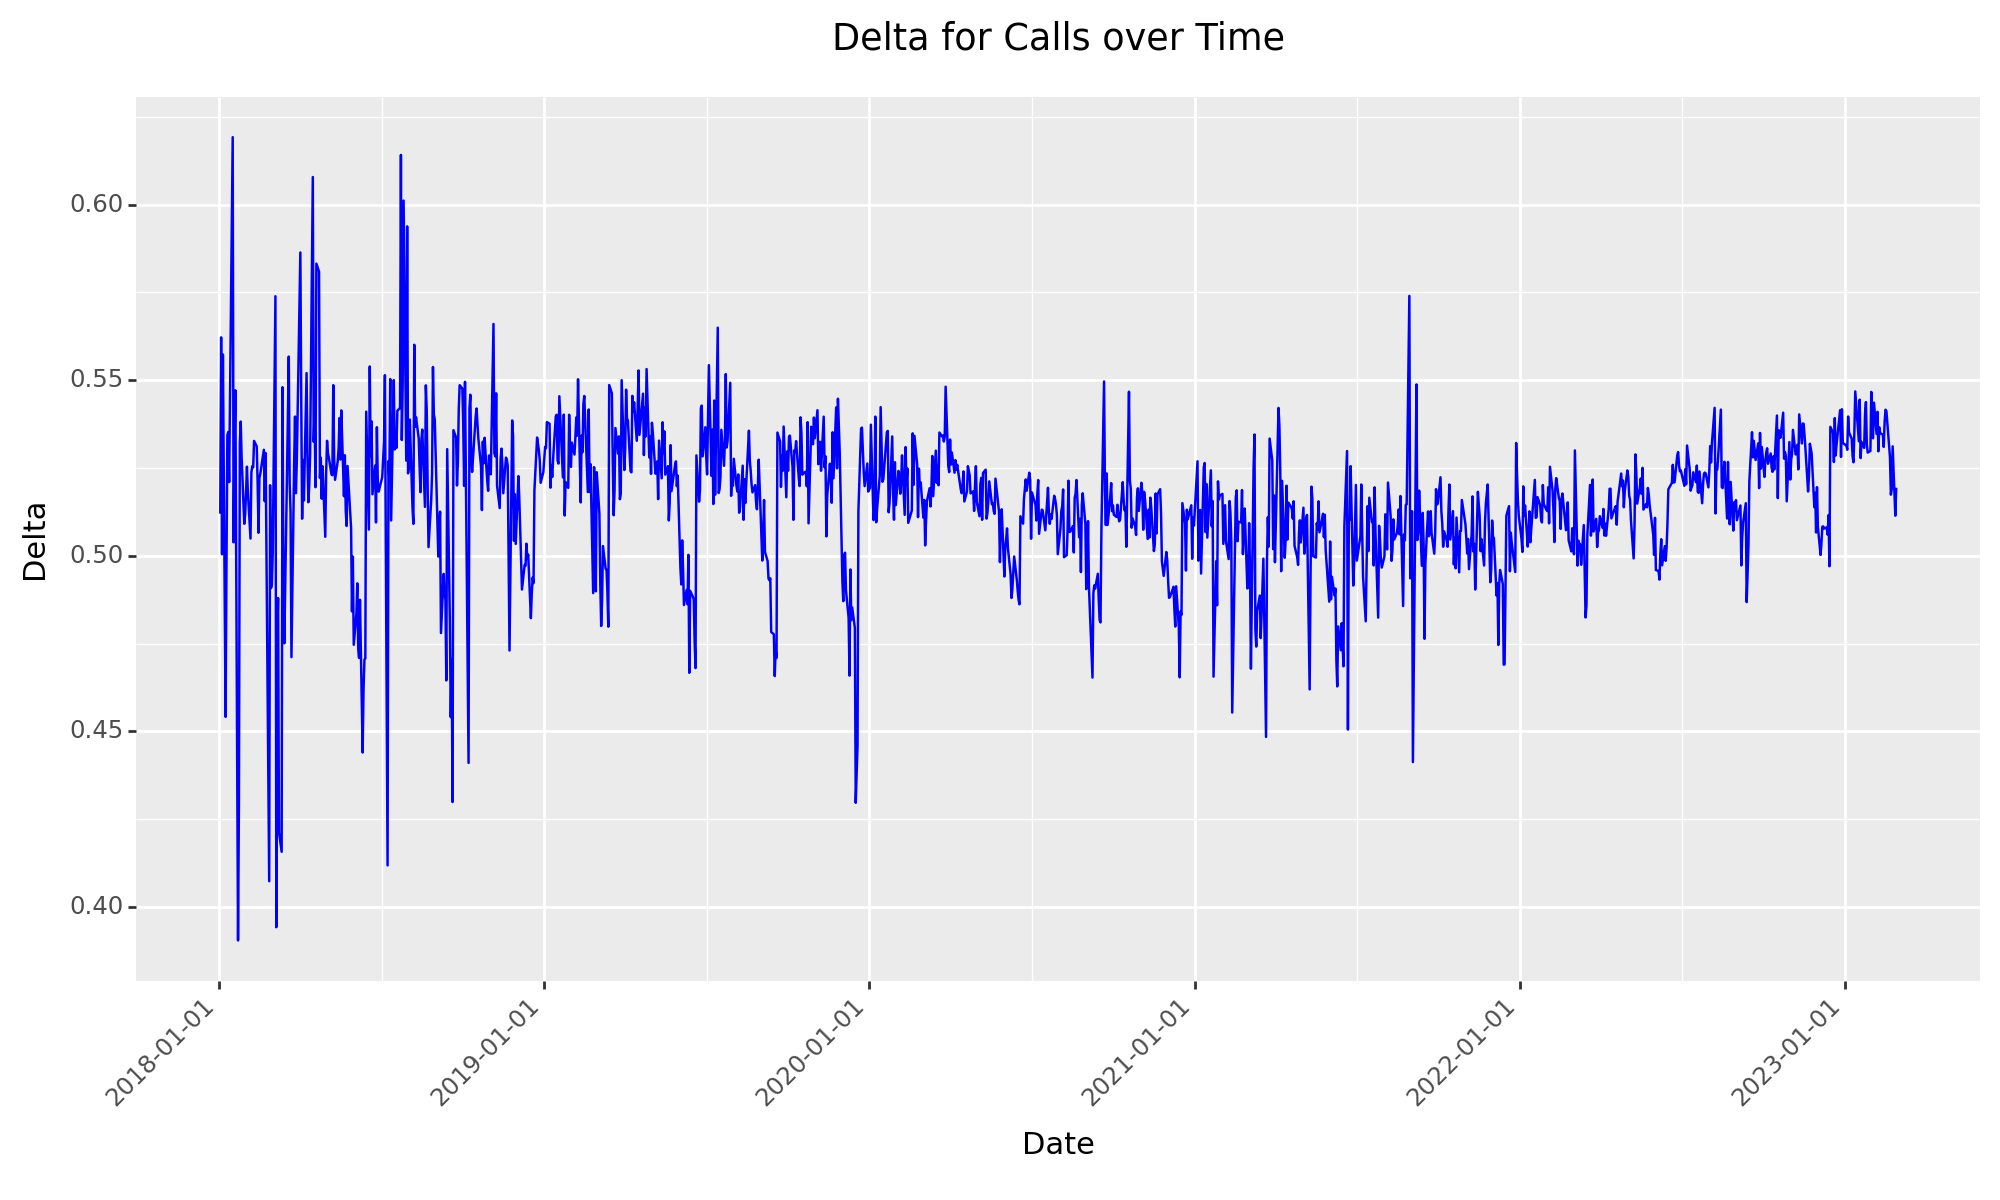

<Figure Size: (1000 x 600)>

In [80]:
p_delta_calls = (ggplot(calls_df, aes(x='date_x', y='delta_x')) +
                 geom_line(color='blue') +
                 labs(title='Delta for Calls over Time', x='Date', y='Delta', color='Type') +
                 theme(axis_text_x=element_text(rotation=45, hjust=1),
                       figure_size=(10, 6),
                       plot_title=element_text(ha='center')))
p_delta_calls

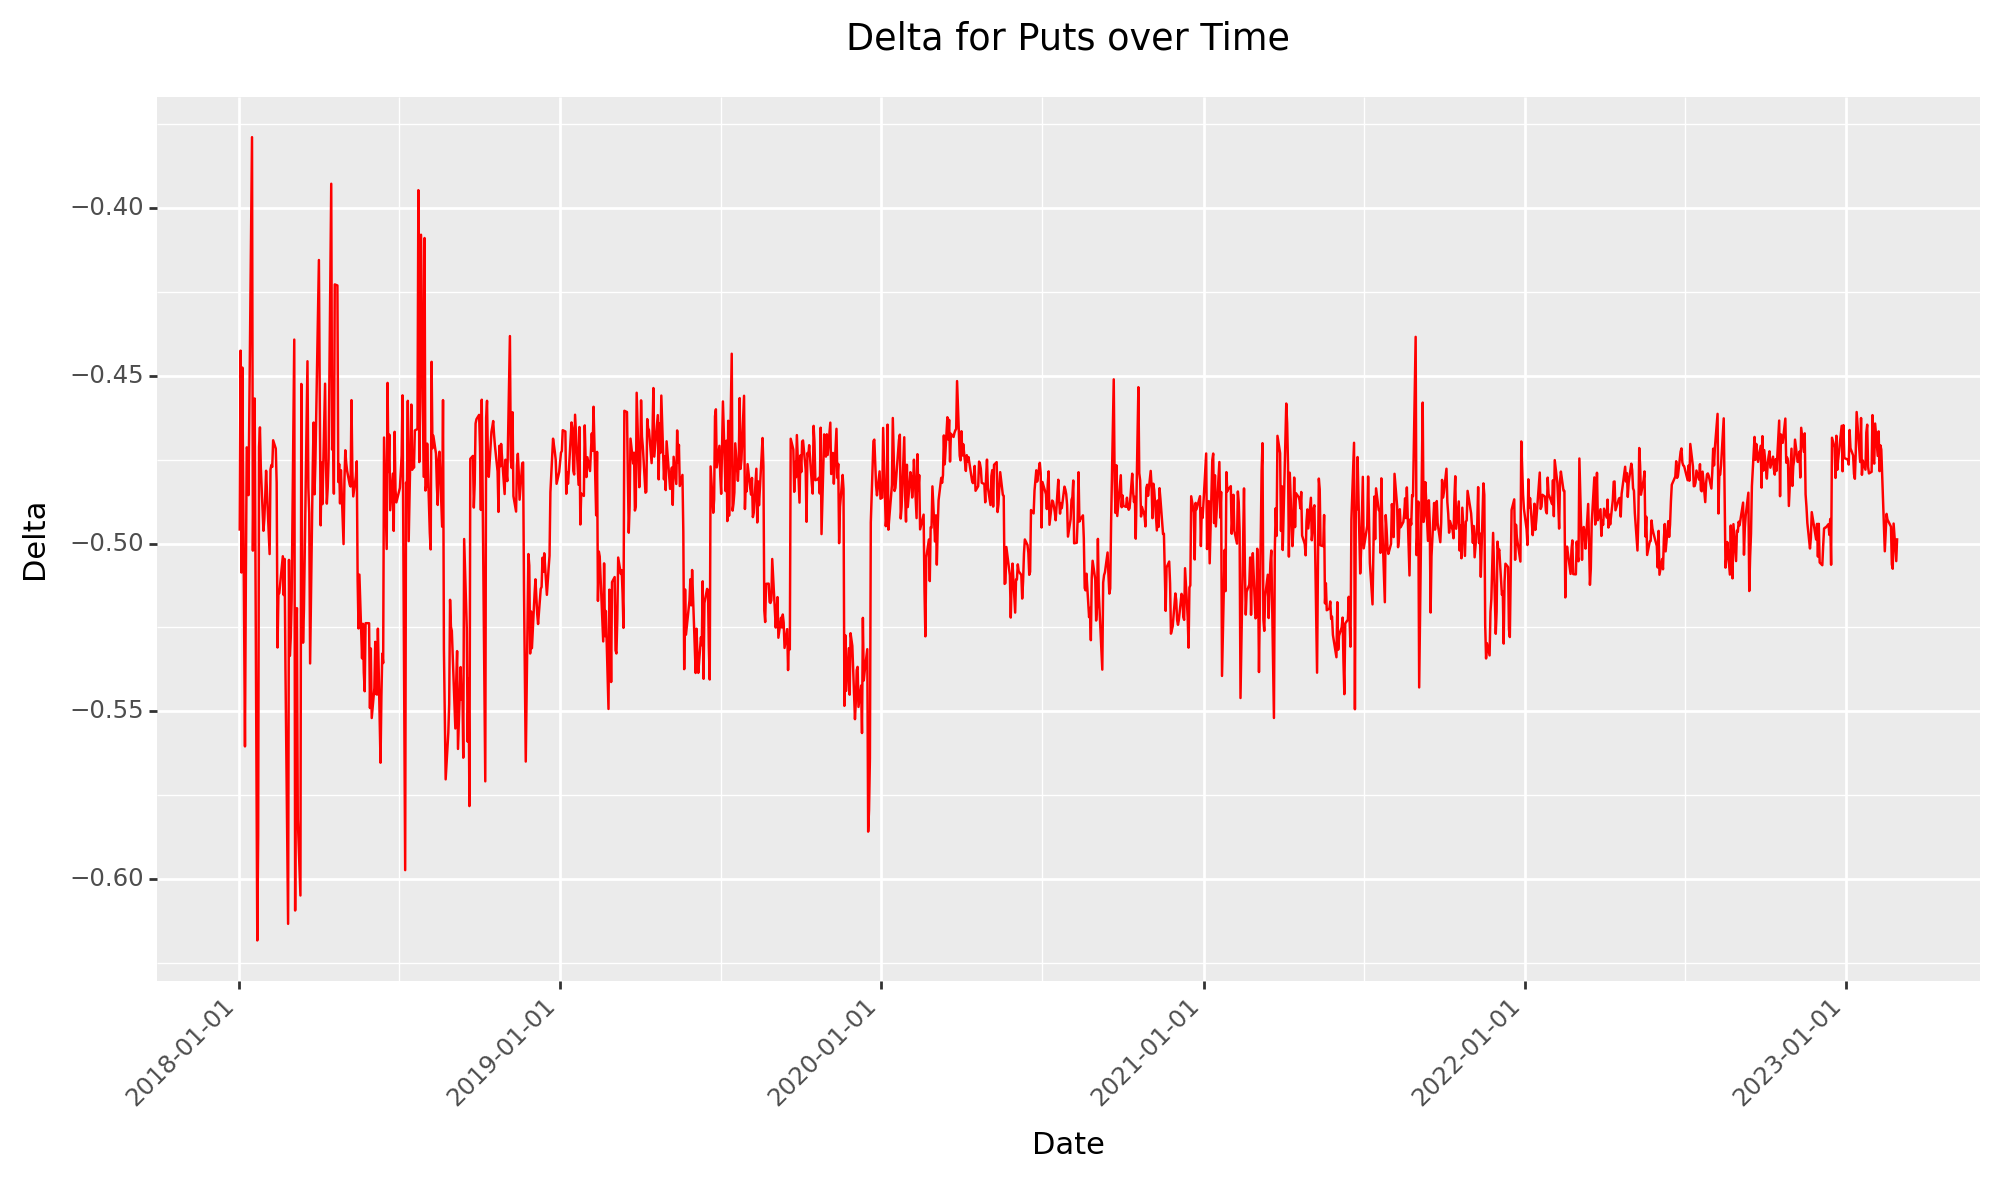

<Figure Size: (1000 x 600)>

In [81]:
p_delta_puts = (ggplot(puts_df, aes(x='date_x', y='delta_x')) +
                geom_line(color='red') +
                labs(title='Delta for Puts over Time', x='Date', y='Delta', color='Type') +
                theme(axis_text_x=element_text(rotation=45, hjust=1),
                      figure_size=(10, 6),
                      plot_title=element_text(ha='center')))
p_delta_puts

We can see that at-the-money calls and puts center around a magnitude of 0.5 delta. There also appears seasonality.

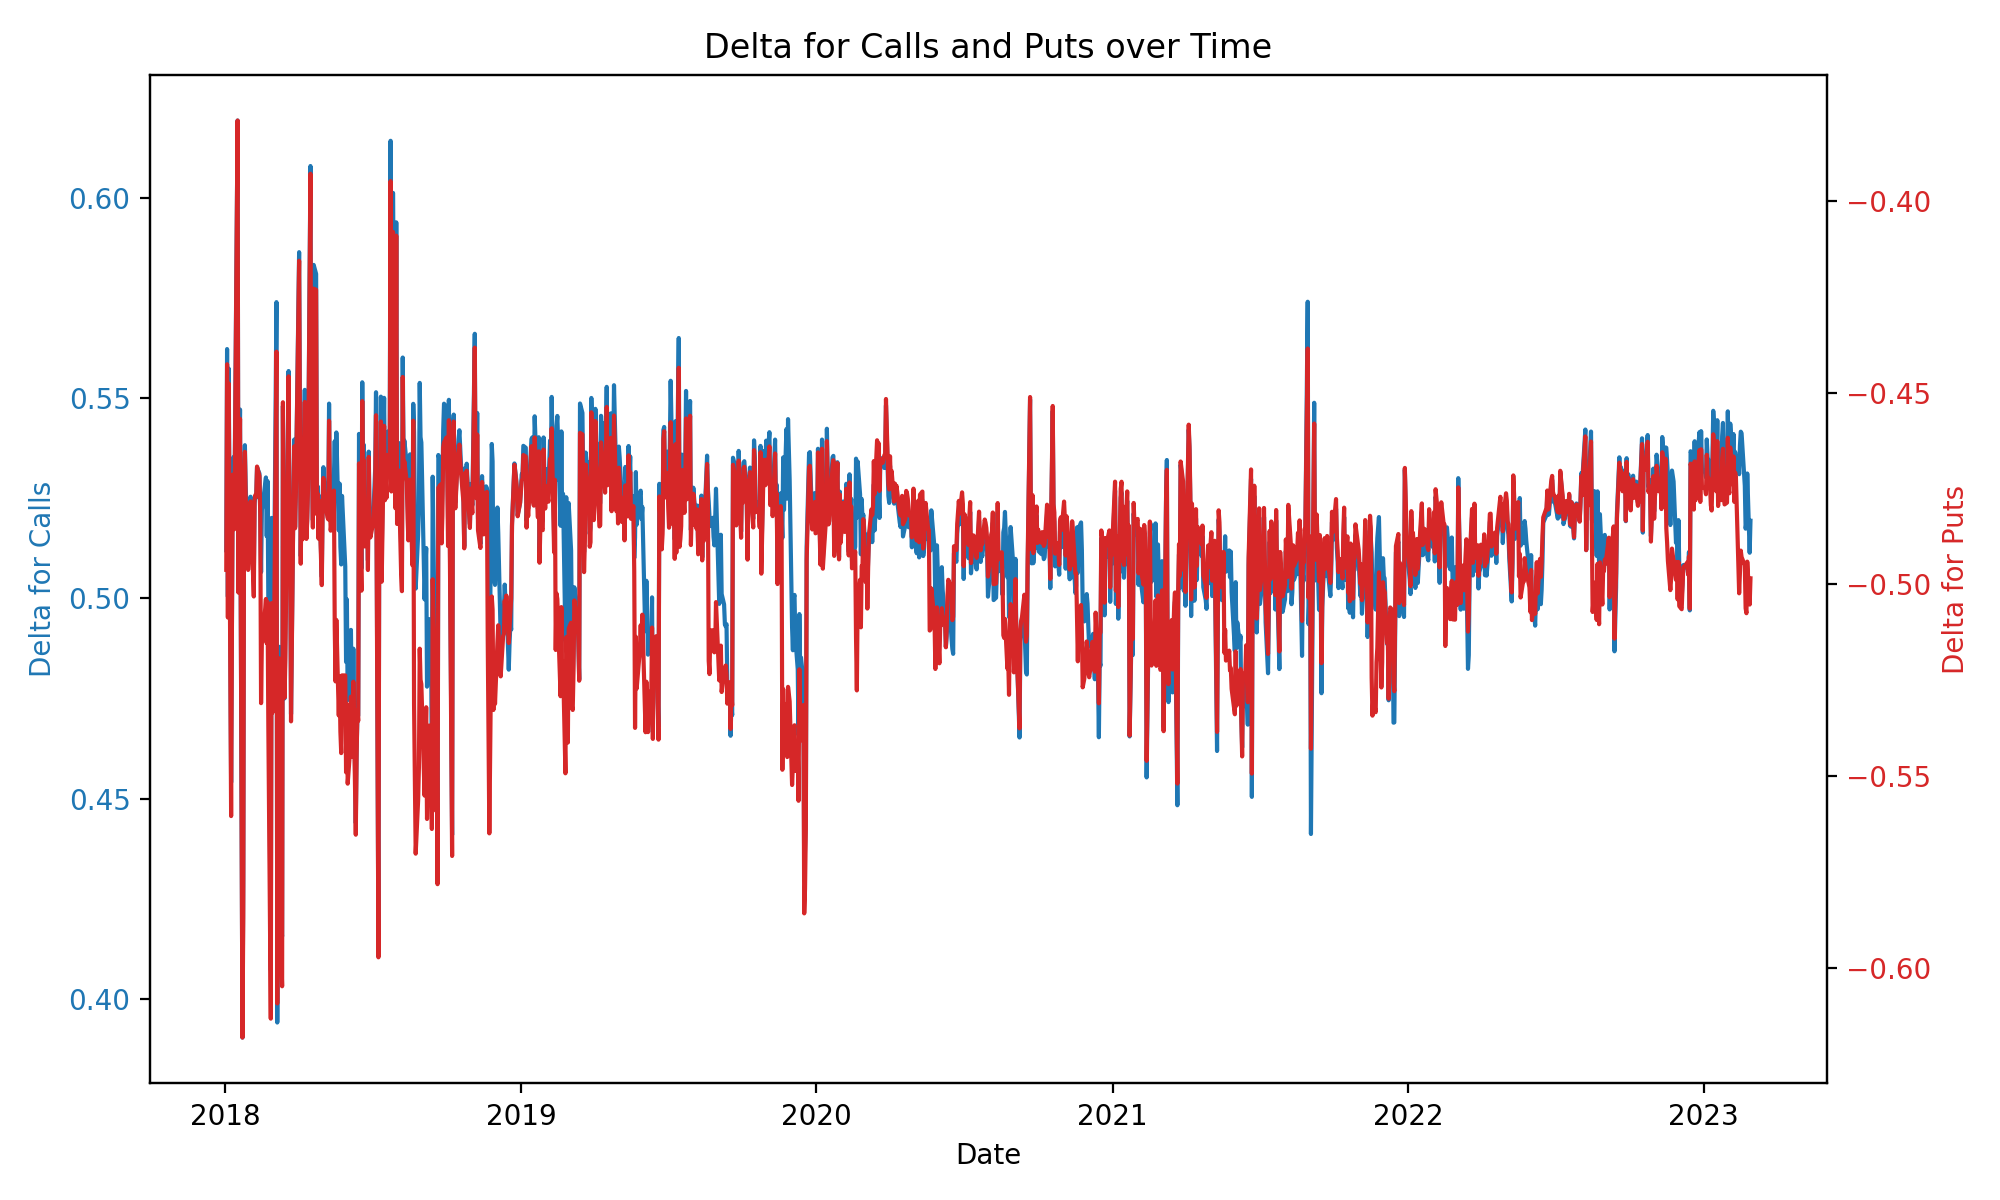

In [82]:
# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Delta for Calls on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Delta for Calls', color=color)
ax1.plot(calls_df['date_x'], calls_df['delta_x'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for Delta for Puts
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Delta for Puts', color=color)
ax2.plot(puts_df['date_x'], puts_df['delta_x'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title and layout adjustments
plt.title('Delta for Calls and Puts over Time')
fig.tight_layout()

plt.show()

We can see that at-the-money calls and puts have similar gamma across multiple times. There also appears to be a regime shift, where gamma is noticably lower post-COVID.

In [98]:
p_gamma = (ggplot(combined_df, aes(x='date_x', y='gamma_x', color='Type')) +
           geom_line() +
           labs(title='Gamma over Time', x='Date', y='Gamma', color='Type') +
           theme(axis_text_x=element_text(rotation=45, hjust=1),
                 figure_size=(10, 6),
                 plot_title=element_text(ha='center')) +
           scale_color_manual(values={"Calls": "blue", "Puts": "red"}))
p_gamma

<Figure Size: (1000 x 600)>

We can see that implied volatility has remained largely flat until the spike during COVID, and it has largely regressed back to pre-pandemic levels albeit perhaps slightly elevated.

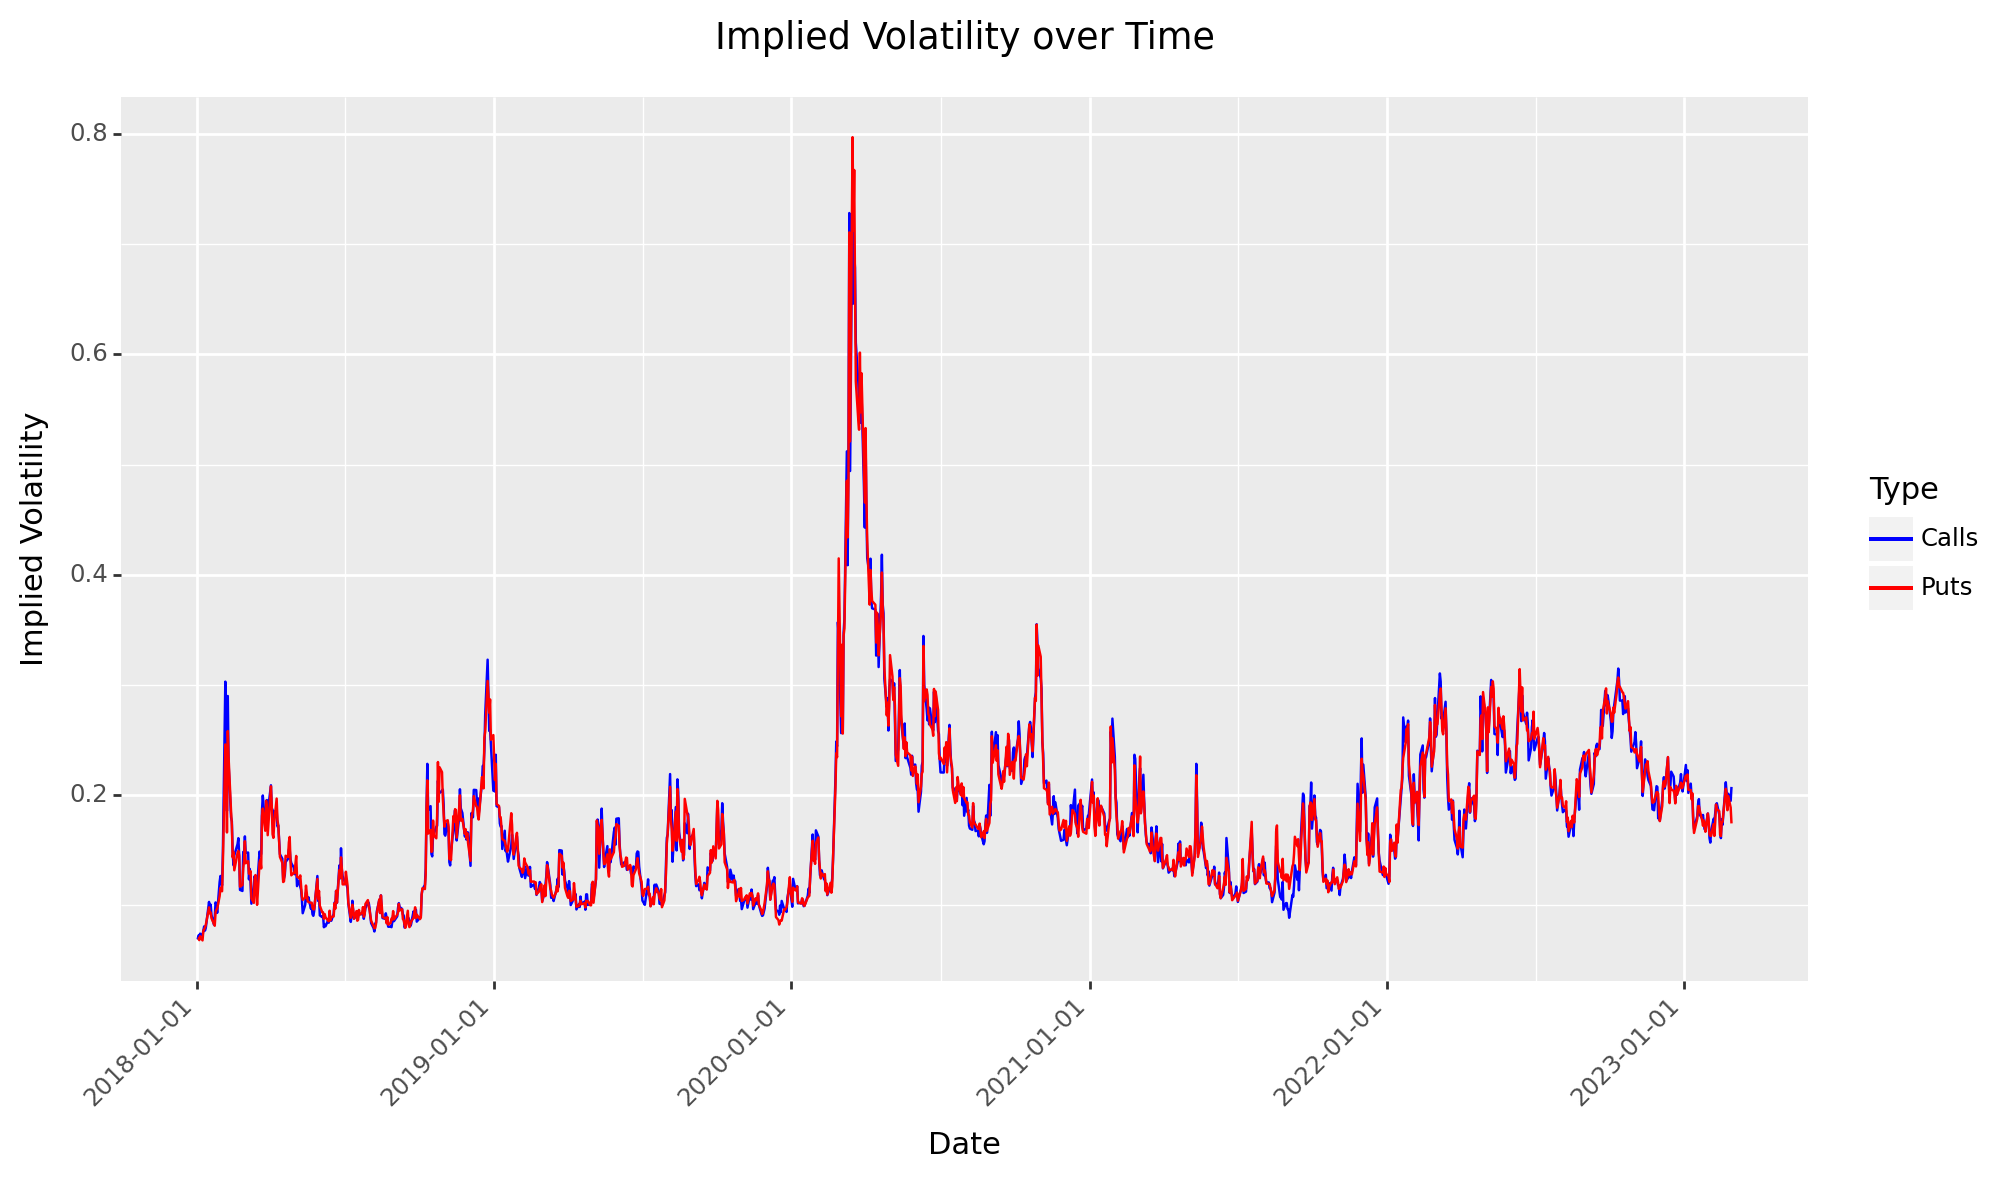

<Figure Size: (1000 x 600)>

In [99]:
p_impl_volatility = (ggplot(combined_df, aes(x='date_x', y='impl_volatility_x', color='Type')) +
                     geom_line() +
                     labs(title='Implied Volatility over Time', x='Date', y='Implied Volatility', color='Type') +
                     theme(axis_text_x=element_text(rotation=45, hjust=1),
                           figure_size=(10, 6),
                           plot_title=element_text(ha='center')) +
                     scale_color_manual(values={"Calls": "blue", "Puts": "red"}))
p_impl_volatility

### Delta, Gamma, and IV for Individual Pairs opened ATM

We'll select a few examples of individual option pairs that we may use for straddles from the beginning, middle, and end sections of the data, and take a look at their progression over time (of the same contracts for our holding period).

In [85]:
calls = pd.read_csv('calls.csv')
puts = pd.read_csv('puts.csv')
datapull = pd.read_csv('spy_tickerdata.csv')
csv_file_path = 'option_data.csv'
spydata = pd.read_csv(csv_file_path)

In [86]:
spydata['date']=pd.to_datetime(spydata['date'], format = '%Y-%m-%d')
spydata['exdate']=pd.to_datetime(spydata['exdate'], format = '%Y-%m-%d')
spydata['dte'] = (spydata['exdate'] - spydata['date']).dt.days
mapping = {'C': 'Call', 'P': 'Put'}
spydata['Type'] = spydata['cp_flag'].map(mapping)

In [87]:
datapull[datapull['date'] == '2018-03-06']

ticker        date   open    high     low   close      volume  dividend  \
6093    SPY  2018-03-06  273.3  273.39  271.18  272.88  78407902.0       0.0   

      split    adj_open   adj_high     adj_low   adj_close  adj_volume  
6093    1.0  246.987725  247.06906  245.071831  246.608161  78407902.0

In [88]:
calls[calls['date_x'] == '2021-02-08']

date_x      exdate last_date_x cp_flag  strike_price  best_bid_x  \
780  2021-02-08  2021-03-10  2021-02-08       C         391.0         6.8   

     best_offer_x  volume_x  open_interest_x  impl_volatility_x  ...  \
780          6.88      19.0              3.0           0.157962  ...   

       vega_x   theta_x  expiry_indicator_x  close_x  adj_open_x  adj_close_x  \
780  44.66742 -43.18171                   w   390.51  372.256242   373.442045   

     adj_volume_x  TTE_x  close_date  is_present  
780    37887680.0     30  2021-03-01        True  

[1 rows x 22 columns]

In [89]:
first_options = spydata[(spydata['exdate'] == '2018-04-04') & (spydata['dte'] < 30) & (spydata['dte'] >=7) & (spydata['strike_price'] == 275000)]
middle_options = spydata[(spydata['exdate'] == '2021-03-10') & (spydata['dte'] < 30) & (spydata['dte'] >=7) & (spydata['strike_price'] == 391000)]
last_options = spydata[(spydata['exdate'] == '2022-07-06') & (spydata['dte'] < 30) & (spydata['dte'] >=7) & (spydata['strike_price'] == 412000)]

In [90]:
first_options = first_options.dropna()
middle_options = middle_options.dropna()
last_options = last_options.dropna()

From the Delta Graphs below we can see that our positions open with call and put deltas each close to one half. As we hold the positions, the underlying moves up or down, and we can see the delta values diverge from one half and go either up or down. Our trading strategy will rebalance by buying and selling the underlying as the delta values change to keep a consistent portfolio Gamma. 

Note that under put-call parity, the Delta of a call option is always exactly 1 greater than the delta of a put option. In practice, this is almost always true, but with slight delays or lags/exceptions between time points.

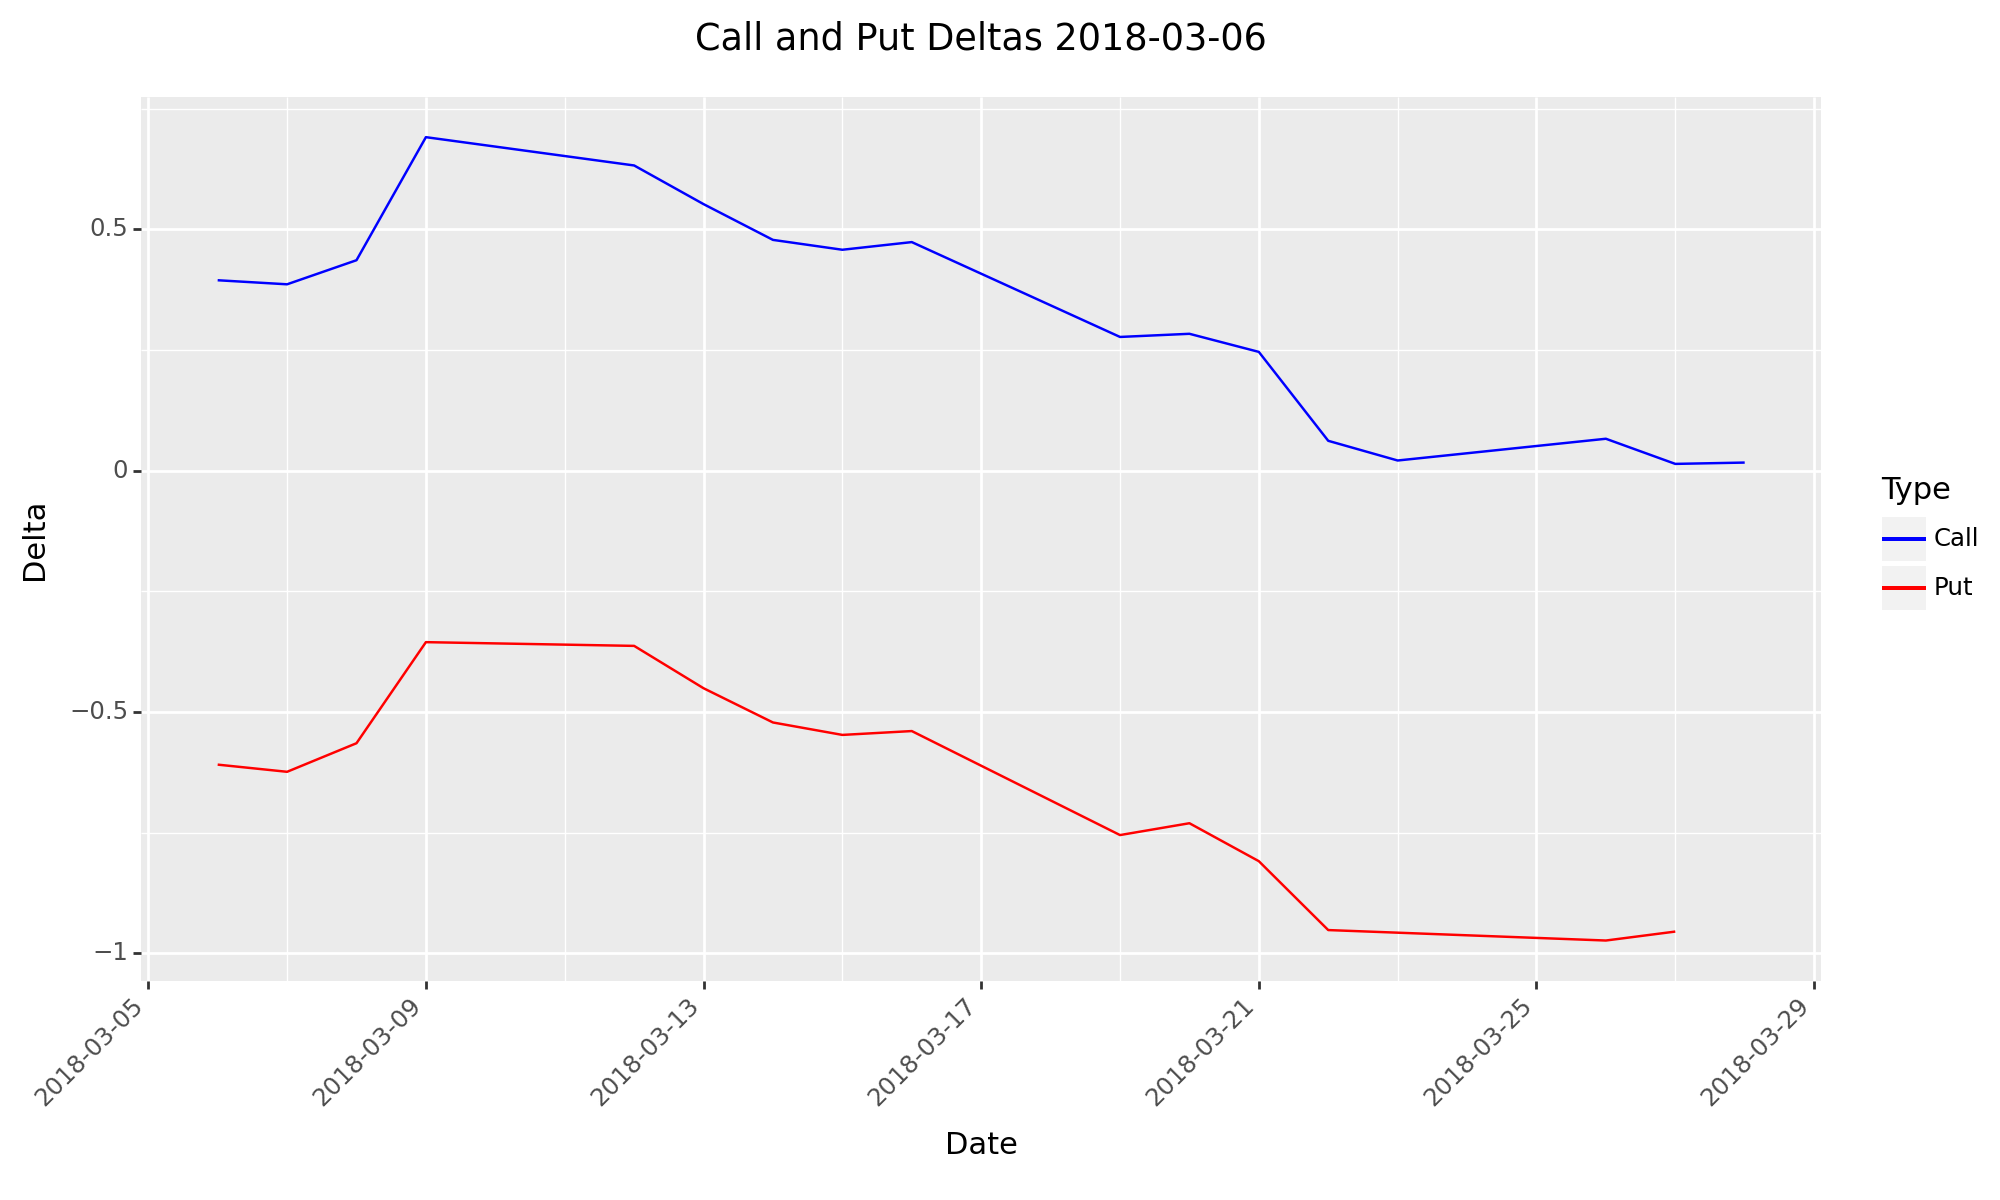

<Figure Size: (1000 x 600)>

In [91]:
p_d_1 = (ggplot(first_options, aes(x='date', y='delta', color='Type')) +
           geom_line() +
           labs(title='Call and Put Deltas 2018-03-06', x='Date', y='Delta', color='Type') +
           theme(axis_text_x=element_text(rotation=45, hjust=1),
                 figure_size=(10, 6),
                 plot_title=element_text(ha='center')) +
           scale_color_manual(values={"Call": "blue", "Put": "red"}))
p_d_1

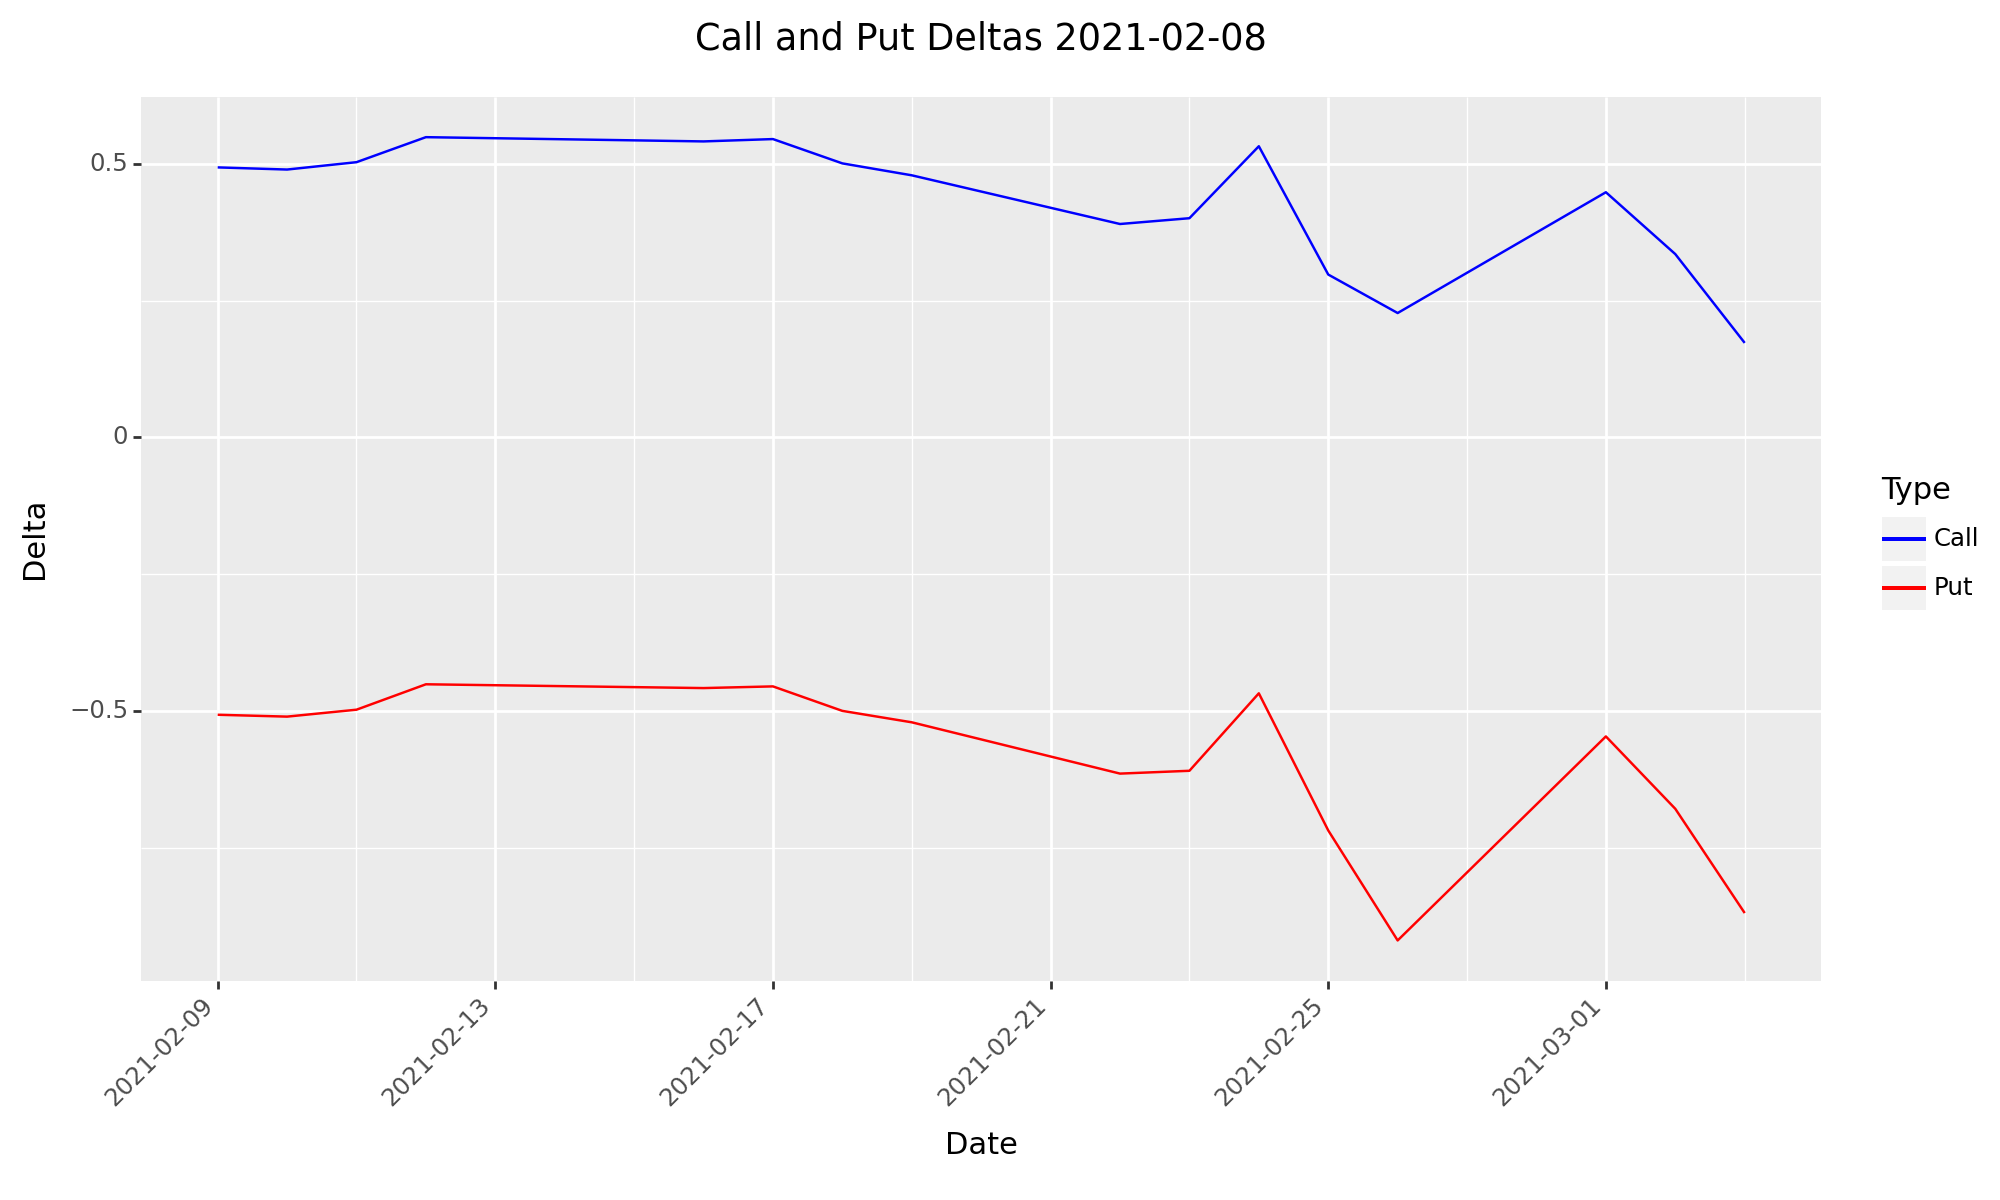

<Figure Size: (1000 x 600)>

In [92]:
p_d_2 = (ggplot(middle_options, aes(x='date', y='delta', color='Type')) +
           geom_line() +
           labs(title='Call and Put Deltas 2021-02-08', x='Date', y='Delta', color='Type') +
           theme(axis_text_x=element_text(rotation=45, hjust=1),
                 figure_size=(10, 6),
                 plot_title=element_text(ha='center')) +
           scale_color_manual(values={"Call": "blue", "Put": "red"}))
p_d_2

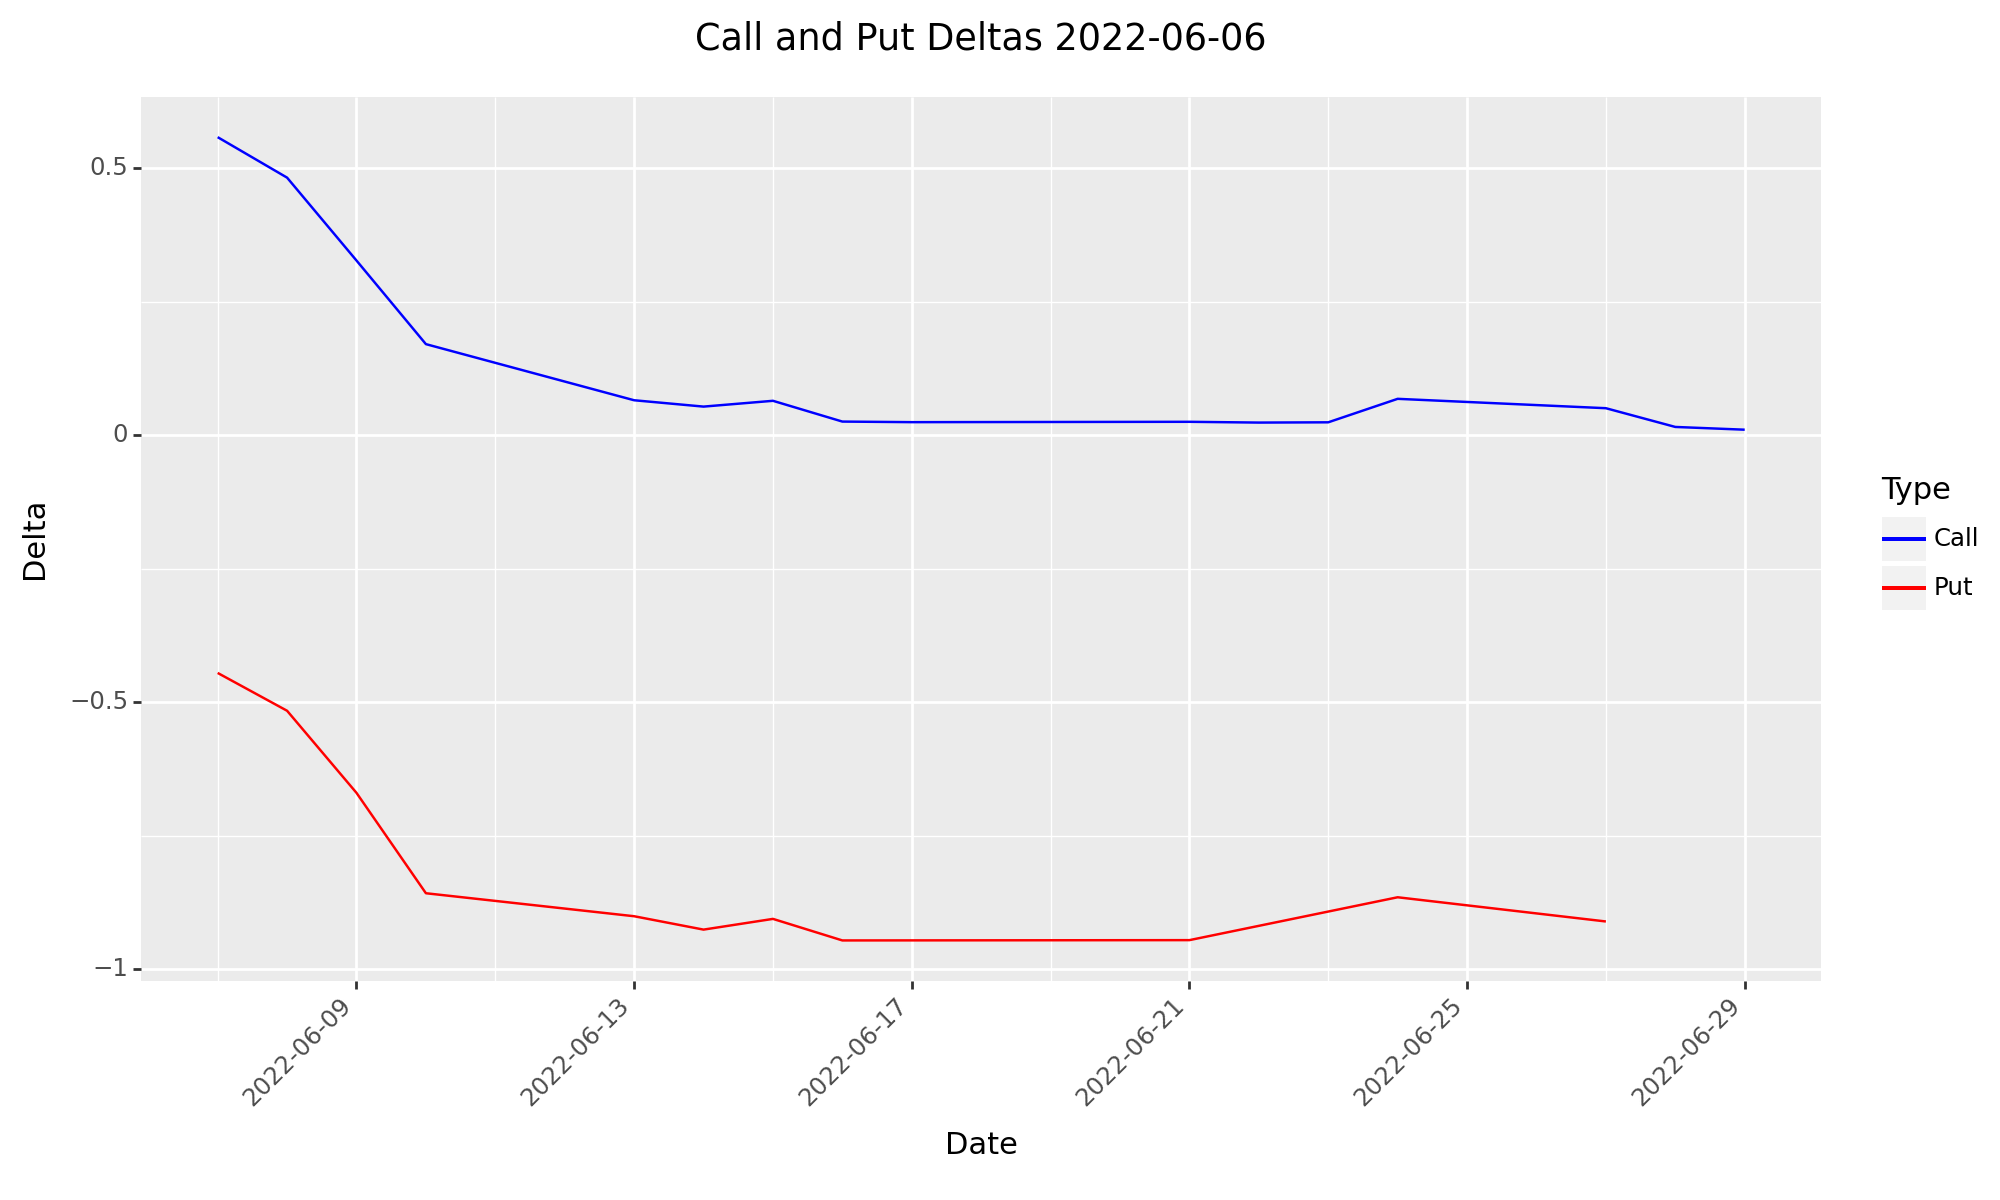

<Figure Size: (1000 x 600)>

In [93]:
p_d_3 = (ggplot(last_options, aes(x='date', y='delta', color='Type')) +
           geom_line() +
           labs(title='Call and Put Deltas 2022-06-06', x='Date', y='Delta', color='Type') +
           theme(axis_text_x=element_text(rotation=45, hjust=1),
                 figure_size=(10, 6),
                 plot_title=element_text(ha='center')) +
           scale_color_manual(values={"Call": "blue", "Put": "red"}))
p_d_3

The graphs below show how Call and Put Gammas may change while we hold them. If the price of the underlying remains constant, the Gamma value will increase; if the price of the underlying decreases, the Gamma value will decrease. Our strategy hopes to identify times when Gamma will increase or decrease with a greater magnitude than the rest of the market assumes. If we anticipate more volatility in the underlying than the market does, we will go long Gamma. Conversely, if we anticipate less volatility than the market does, we will go short Gamma.

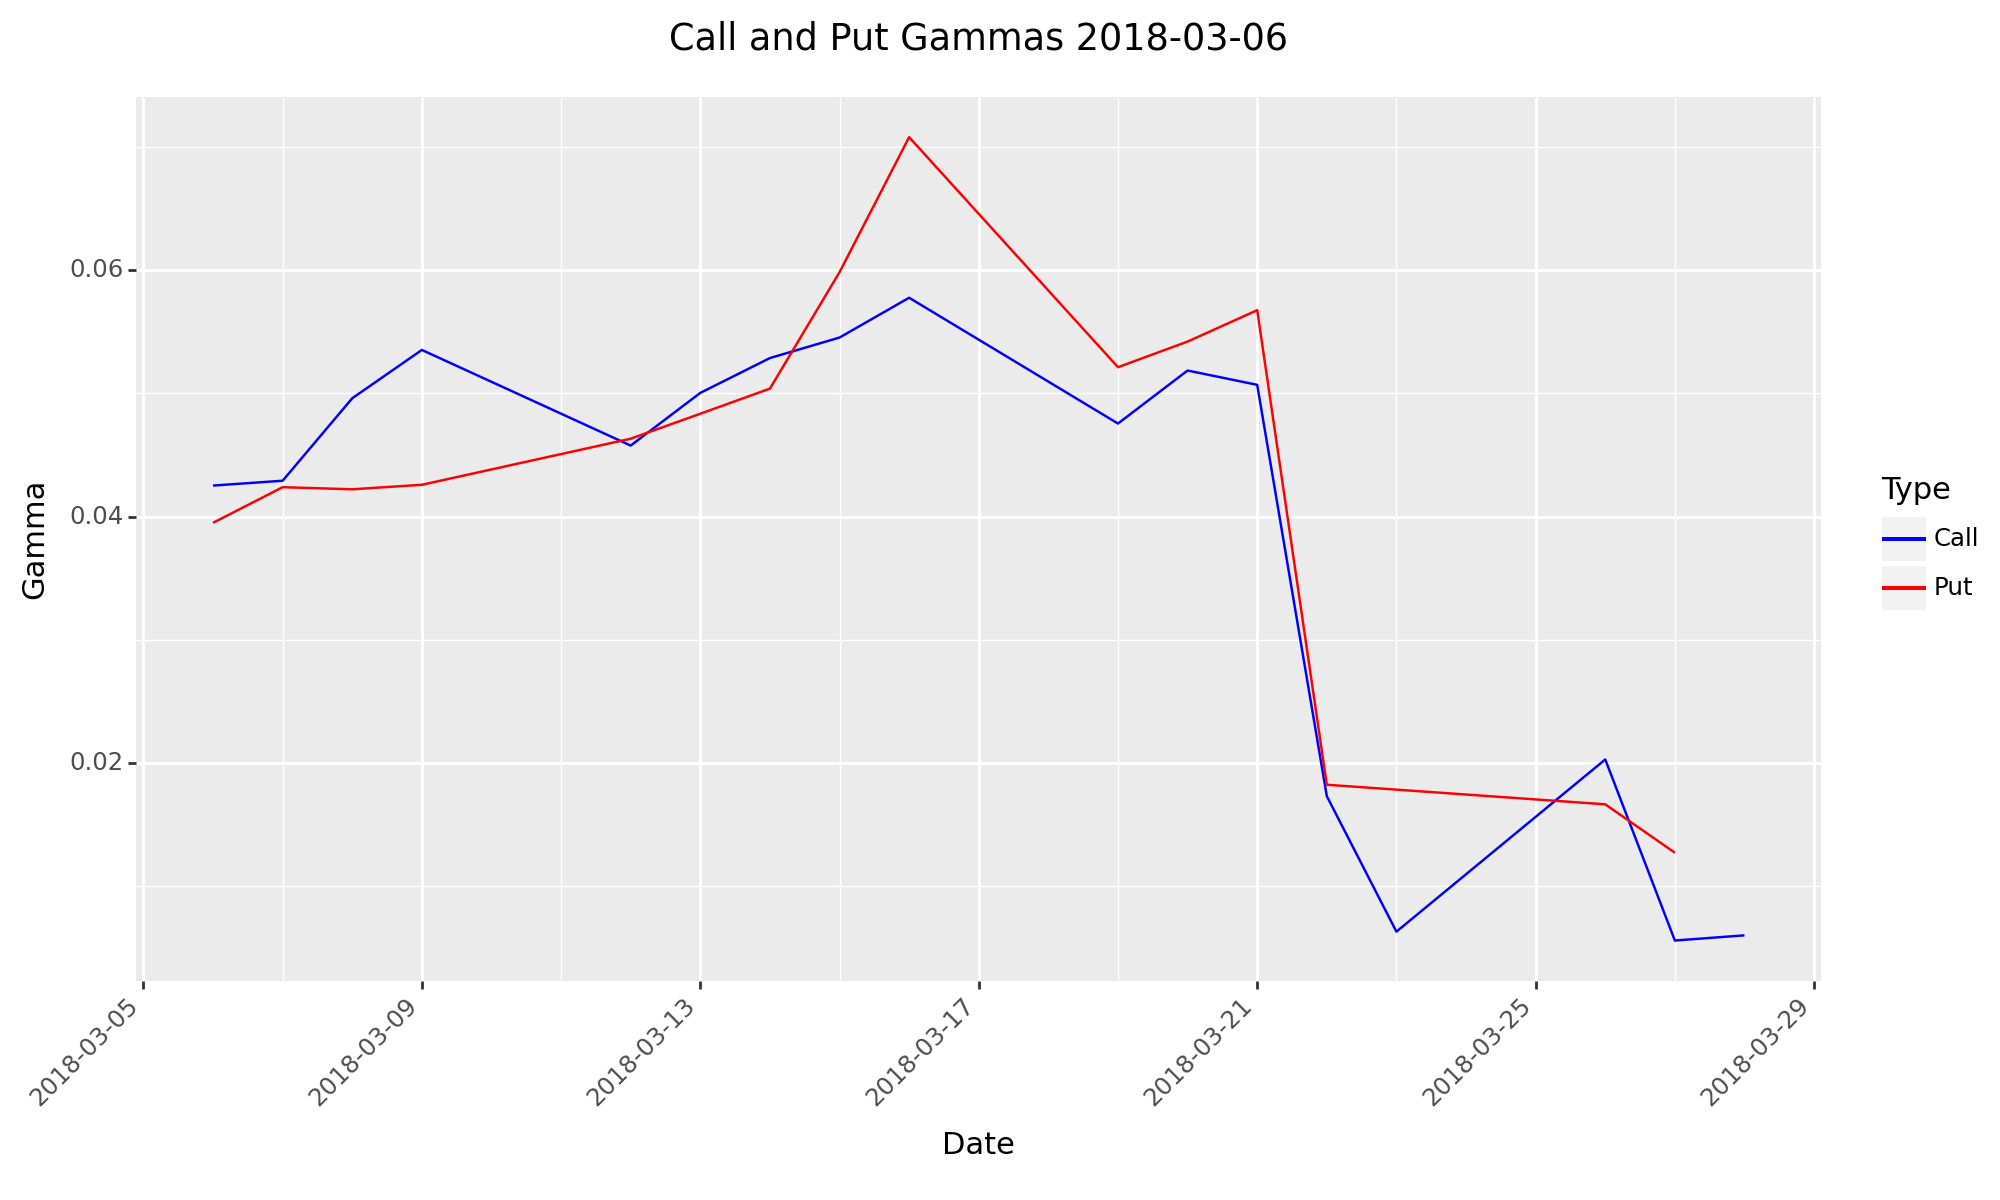

<Figure Size: (1000 x 600)>

In [94]:
p_g_1 = (ggplot(first_options, aes(x='date', y='gamma', color='Type')) +
           geom_line() +
           labs(title='Call and Put Gammas 2018-03-06', x='Date', y='Gamma', color='Type') +
           theme(axis_text_x=element_text(rotation=45, hjust=1),
                 figure_size=(10, 6),
                 plot_title=element_text(ha='center')) +
           scale_color_manual(values={"Call": "blue", "Put": "red"}))
p_g_1

In [95]:
p_g_2 = (ggplot(middle_options, aes(x='date', y='gamma', color='Type')) +
           geom_line() +
           labs(title='Call and Put Gammas 2021-02-08', x='Date', y='Gamma', color='Type') +
           theme(axis_text_x=element_text(rotation=45, hjust=1),
                 figure_size=(10, 6),
                 plot_title=element_text(ha='center')) +
           scale_color_manual(values={"Call": "blue", "Put": "red"}))
p_g_2

<Figure Size: (1000 x 600)>

In [96]:
p_g_3 = (ggplot(last_options, aes(x='date', y='gamma', color='Type')) +
           geom_line() +
           labs(title='Call and Put Gammas 2022-06-06', x='Date', y='Gamma', color='Type') +
           theme(axis_text_x=element_text(rotation=45, hjust=1),
                 figure_size=(10, 6),
                 plot_title=element_text(ha='center')) +
           scale_color_manual(values={"Call": "blue", "Put": "red"}))
p_g_3

<Figure Size: (1000 x 600)>

### Volume and Open Interest for Individual Days

We can also visualize the volume and open interest for various strikes on single days - for consistency, we can take a look at the same few days we visualized above.

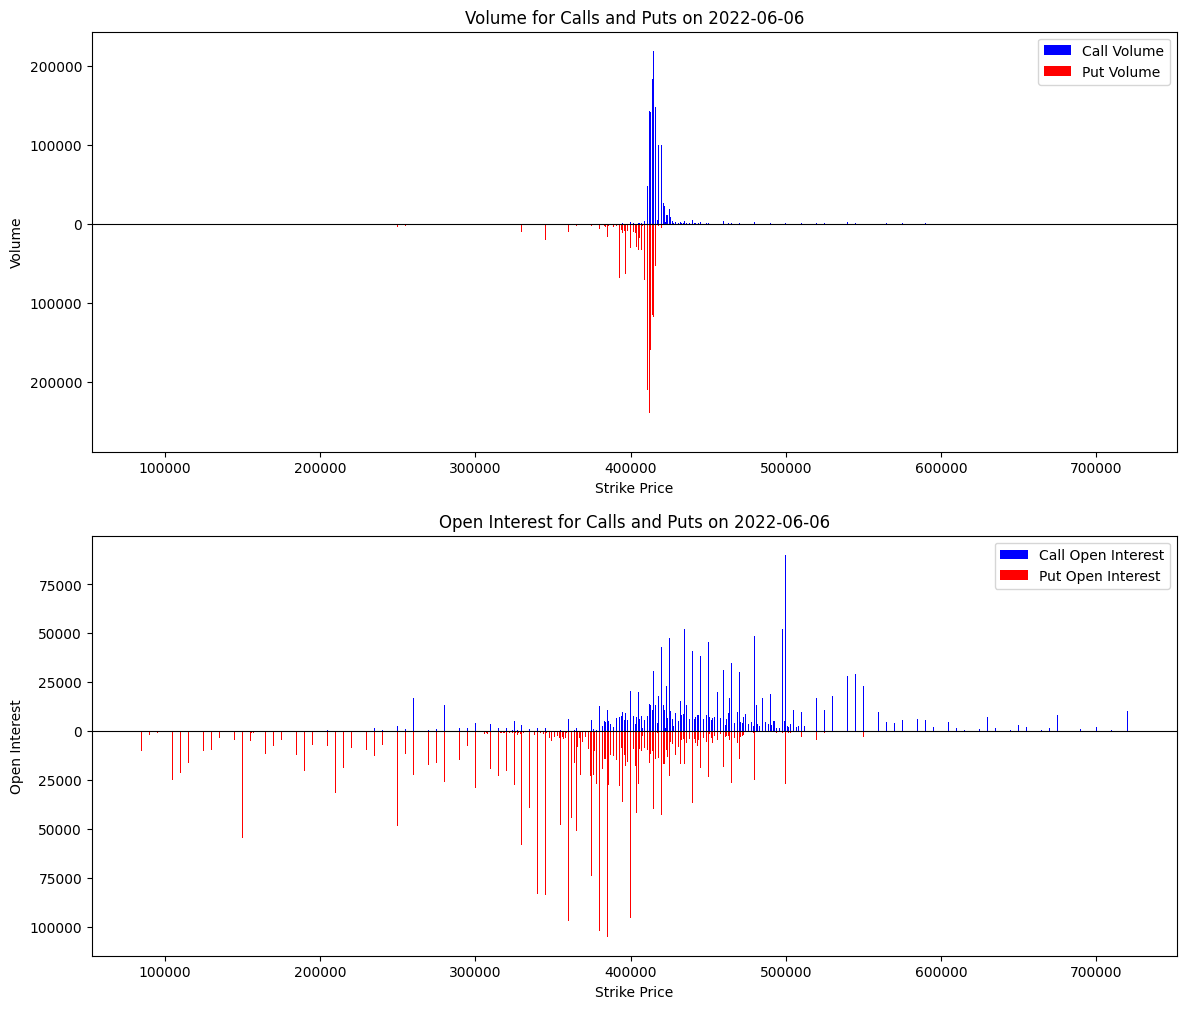

In [3]:
data = pd.read_csv("option_data.csv")

data['date'] = pd.to_datetime(data['date'])

specific_dates = ['2018-03-06', '2021-02-08', '2022-06-06']

for specific_date in specific_dates:
    data_on_specific_date = data[data['date'] == specific_date]

    calls = data_on_specific_date[data_on_specific_date['cp_flag'] == 'C']
    puts = data_on_specific_date[data_on_specific_date['cp_flag'] == 'P']

    puts_volume = puts.copy()
    puts_oi = puts.copy()
    puts_volume['volume'] = -puts_volume['volume']
    puts_oi['open_interest'] = -puts_oi['open_interest']

    combined_volume = pd.concat([calls, puts_volume]).sort_values(by='strike_price')
    combined_oi = pd.concat([calls, puts_oi]).sort_values(by='strike_price')

    fig, axs = plt.subplots(2, 1, figsize=(14, 12))

    axs[0].bar(combined_volume['strike_price'][combined_volume['volume'] > 0], combined_volume['volume'][combined_volume['volume'] > 0], color='blue', width=500, label='Call Volume')
    axs[0].bar(combined_volume['strike_price'][combined_volume['volume'] < 0], combined_volume['volume'][combined_volume['volume'] < 0], color='red', width=500, label='Put Volume')
    axs[0].set_title(f'Volume for Calls and Puts on {specific_date}')
    axs[0].set_xlabel('Strike Price')
    axs[0].set_ylabel('Volume')
    axs[0].axhline(0, color='black', linewidth=0.8)
    axs[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: int(abs(x))))
    axs[0].legend()

    axs[1].bar(combined_oi['strike_price'][combined_oi['open_interest'] > 0], combined_oi['open_interest'][combined_oi['open_interest'] > 0], color='blue', width=500, label='Call Open Interest')
    axs[1].bar(combined_oi['strike_price'][combined_oi['open_interest'] < 0], combined_oi['open_interest'][combined_oi['open_interest'] < 0], color='red', width=500, label='Put Open Interest')
    axs[1].set_title(f'Open Interest for Calls and Puts on {specific_date}')
    axs[1].set_xlabel('Strike Price')
    axs[1].set_ylabel('Open Interest')
    axs[1].axhline(0, color='black', linewidth=0.8)
    axs[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: int(abs(x))))
    axs[1].legend()
    

The plots above show the volume and open interest quantities for both calls and puts for three different dates throughout the five-year time period. We first observed that the volume quantity for our chosen date in 2018 was nearly 1/5th the quantities observed in the chosen 2021 and 2022 dates near the middle and end of the time span. Individually this does not say too much other than noting that different days will have different distributions, but can provide, considering the other graphs, some additional context for different time perioids. Additionally, as consistently observed for all 3 dates, quantites for volume and open interest for calls are right-skewed while quantities for volume and open interest for puts are left-skewed, ie. there are certain moves far out of the money. Additionally, the open interest values were more spread out than those for volume. Moreover, volume and open interest quantities are heavily concentrated at-the-money while the tails are heavily spread out towards out-of-the-money. 

## 6. Currently in progress: Simulations, Further Data Manipulations and Calculating our IV

As part of the outlined strategy, we'll be simulating the strategy and also considering using a calculation of IV found in a paper to open trades relative to the gamma. We will not have our IV calculation done by this draft, but we have some progress below.

### Further data restructuring

This uses the previous checkpoint to load the data. For the final version, we will clean up the variables to consistently use a single variable. For now, we'll allow different variables.

In [103]:
csv_file_path = 'combinedata.csv'
data = pd.read_csv(csv_file_path)
calls_df = pd.read_csv('calls.csv')
puts_df = pd.read_csv('puts.csv')

In [104]:
calls_df.rename(columns={'date_x': 'date'}, inplace=True)
puts_df.rename(columns={'date_x': 'date'}, inplace=True)

calls_df['date'] = pd.to_datetime(calls_df['date'])
puts_df['date'] = pd.to_datetime(puts_df['date'])

To make our analysis easier, we'll merge the dataframes from puts and calls on the same strike for the days that we may potentially open positions at (ie. every day with data filled for the next holding period for that contract).

We'll check that they match, of course.

In [105]:
calls_grouped = calls_df.groupby('date')['strike_price'].apply(list).reset_index(name='calls_strike_prices')
puts_grouped = puts_df.groupby('date')['strike_price'].apply(list).reset_index(name='puts_strike_prices')

merged_df = pd.merge(calls_grouped, puts_grouped, on='date')

merged_df['strike_prices_match'] = merged_df.apply(lambda row: set(row['calls_strike_prices']) == set(row['puts_strike_prices']), axis=1)

dates_strike_prices_dont_match = merged_df[merged_df['strike_prices_match'] == False]['date']
print(dates_strike_prices_dont_match)

Series([], Name: date, dtype: datetime64[ns])


In [106]:
calls_df['date'] = pd.to_datetime(calls_df['date'])
puts_df['date'] = pd.to_datetime(puts_df['date'])
calls_df['exdate'] = pd.to_datetime(calls_df['exdate'])
puts_df['exdate'] = pd.to_datetime(puts_df['exdate'])

calls_grouped = calls_df.groupby('date').apply(lambda x: list(zip(x['strike_price'], x['exdate']))).reset_index(name='calls_data')
puts_grouped = puts_df.groupby('date').apply(lambda x: list(zip(x['strike_price'], x['exdate']))).reset_index(name='puts_data')

merged_df = pd.merge(calls_grouped, puts_grouped, on='date')

merged_df['data_match'] = merged_df.apply(lambda row: set(row['calls_data']) == set(row['puts_data']), axis=1)

dates_data_dont_match = merged_df[merged_df['data_match'] == False]['date']
print(dates_data_dont_match)

Series([], Name: date, dtype: datetime64[ns])


C:\Users\axrpo\AppData\Local\Temp\ipykernel_3176\1750144796.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
C:\Users\axrpo\AppData\Local\Temp\ipykernel_3176\1750144796.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


Now merge,

In [107]:
calls_df.rename(columns={
    'close_x': 'close',
    'adj_open_x': 'adj_open',
    'adj_close_x': 'adj_close',
    'adj_volume_x': 'adj_volume',
    'TTE_x': 'TTE',
    'last_date_x': 'last_date_c',
    'best_bid_x': 'best_bid_c',
    'best_offer_x': 'best_offer_c',
    'volume_x': 'volume_c',
    'open_interest_x': 'open_interest_c',
    'impl_volatility_x': 'impl_volatility_c',
    'delta_x': 'delta_c',
    'gamma_x': 'gamma_c',
    'vega_x': 'vega_c',
    'theta_x': 'theta_c',
    'expiry_indicator_x': 'expiry_indicator_c',
    'is_present': 'is_present_c'
}, inplace=True)

calls_df = calls_df[['date', 'exdate', 'strike_price', 'close_date', 'close', 'adj_open', 'adj_close', 'adj_volume', 'TTE', 'last_date_c', 'best_bid_c', 'best_offer_c', 'volume_c', 'open_interest_c', 'impl_volatility_c', 'delta_c', 'gamma_c', 'vega_c', 'theta_c', 'expiry_indicator_c', 'is_present_c']]

In [108]:
puts_df.rename(columns={
    'last_date_x': 'last_date_p',
    'best_bid_x': 'best_bid_p',
    'best_offer_x': 'best_offer_p',
    'volume_x': 'volume_p',
    'open_interest_x': 'open_interest_p',
    'impl_volatility_x': 'impl_volatility_p',
    'delta_x': 'delta_p',
    'gamma_x': 'gamma_p',
    'vega_x': 'vega_p',
    'theta_x': 'theta_p',
    'expiry_indicator_x': 'expiry_indicator_p',
    'is_present': 'is_present_p'
}, inplace=True)

puts_df_selected = puts_df[['date', 'last_date_p', 'best_bid_p', 'best_offer_p', 'volume_p', 'open_interest_p', 'impl_volatility_p', 'delta_p', 'gamma_p', 'vega_p', 'theta_p', 'expiry_indicator_p', 'is_present_p']]

In [109]:
option_df = pd.merge(calls_df, puts_df_selected, on='date', how='left')
display(option_df)

date     exdate  strike_price  close_date   close    adj_open  \
0    2018-01-02 2018-01-31         269.0  2018-01-23  268.77  242.053393   
1    2018-01-03 2018-02-02         270.0  2018-01-24  270.47  243.065564   
2    2018-01-04 2018-02-02         272.0  2018-01-25  271.61  245.089905   
3    2018-01-05 2018-02-02         273.0  2018-01-26  273.42  246.273783   
4    2018-01-08 2018-02-07         275.0  2018-01-29  273.92  246.996762   
...         ...        ...           ...         ...     ...         ...   
1293 2023-02-22 2023-03-24         399.0  2023-02-28  398.54  393.496030   
1294 2023-02-23 2023-03-24         401.0  2023-02-28  400.66  395.505271   
1295 2023-02-24 2023-03-24         396.0  2023-02-28  396.38  389.457850   
1296 2023-02-27 2023-03-31         398.0  2023-02-28  397.73  393.840753   
1297 2023-02-28 2023-03-31         396.0  2023-02-28  396.26  391.240559   

       adj_close   adj_volume  TTE last_date_c  ...  best_offer_p  volume_p  \
0     242.893856   86655749.0   29  2018-01-02  ...          2.10     198.0   
1     244.430187   90070416.0   30  2018-01-03  ...          1.80    1060.0   
2     245.460432   80595402.0   29  2018-01-04  ...          2.15     416.0   
3     247.096172   83468662.0   28  2018-01-05  ...          1.85     509.0   
4     247.548034   57288979.0   30  2018-01-08  ...          2.56      82.0   
...          ...          ...  ...         ...  ...           ...       ...   
1293  392.530807   83574386.0   30  2023-02-22  ...          9.71    2678.0   
1294  394.618841   95842681.0   29  2023-02-23  ...          8.86    1233.0   
1295  390.403375  108144866.0   28  2023-02-24  ...          8.84    3156.0   
1296  391.733020   80318244.0   32  2023-02-27  ...          9.26    1568.0   
1297  390.285185   96141367.0   31  2023-02-28  ...          8.17    1375.0   

      open_interest_p  impl_volatility_p   delta_p   gamma_p    vega_p  \
0                33.0           0.069577 -0.496183  0.077797  30.11151   
1               330.0           0.069568 -0.442522  0.074853  30.52431   
2               304.0           0.068201 -0.508652  0.078707  30.40449   
3               149.0           0.071740 -0.447556  0.074347  29.86764   
4               269.0           0.067924 -0.560465  0.076891  30.79770   
...               ...                ...       ...       ...       ...   
1293           1317.0           0.201626 -0.506205  0.017387  45.30915   
1294           1566.0           0.186139 -0.507514  0.019064  44.77837   
1295           1086.0           0.198990 -0.494048  0.018342  43.53449   
1296           4088.0           0.188579 -0.505251  0.018253  46.60089   
1297           6481.0           0.174174 -0.498412  0.020189  45.68817   

       theta_p  expiry_indicator_p is_present_p  
0    -11.46749                   w         True  
1    -11.33461                   w         True  
2    -11.28616                   w         True  
3    -12.34094                   w         True  
4    -10.80407                   w         True  
...        ...                 ...          ...  
1293 -47.38424                   w         True  
1294 -44.24160                   w         True  
1295 -48.60954                   w         True  
1296 -42.60824                   m         True  
1297 -39.53407                   m         True  

[1298 rows x 33 columns]

Creating a new dataframe where start dates with missing values are removed, according to our initial analysis.

In [110]:
option_df1 = option_df[(option_df['is_present_c'] == True) & (option_df['is_present_p'] == True)]
display(option_df1)

date     exdate  strike_price  close_date   close    adj_open  \
0    2018-01-02 2018-01-31         269.0  2018-01-23  268.77  242.053393   
1    2018-01-03 2018-02-02         270.0  2018-01-24  270.47  243.065564   
2    2018-01-04 2018-02-02         272.0  2018-01-25  271.61  245.089905   
4    2018-01-08 2018-02-07         275.0  2018-01-29  273.92  246.996762   
5    2018-01-09 2018-02-07         275.0  2018-01-30  274.54  247.981821   
...         ...        ...           ...         ...     ...         ...   
1293 2023-02-22 2023-03-24         399.0  2023-02-28  398.54  393.496030   
1294 2023-02-23 2023-03-24         401.0  2023-02-28  400.66  395.505271   
1295 2023-02-24 2023-03-24         396.0  2023-02-28  396.38  389.457850   
1296 2023-02-27 2023-03-31         398.0  2023-02-28  397.73  393.840753   
1297 2023-02-28 2023-03-31         396.0  2023-02-28  396.26  391.240559   

       adj_close   adj_volume  TTE last_date_c  ...  best_offer_p  volume_p  \
0     242.893856   86655749.0   29  2018-01-02  ...          2.10     198.0   
1     244.430187   90070416.0   30  2018-01-03  ...          1.80    1060.0   
2     245.460432   80595402.0   29  2018-01-04  ...          2.15     416.0   
4     247.548034   57288979.0   30  2018-01-08  ...          2.56      82.0   
5     248.108343   57253957.0   29  2018-01-09  ...          2.47     453.0   
...          ...          ...  ...         ...  ...           ...       ...   
1293  392.530807   83574386.0   30  2023-02-22  ...          9.71    2678.0   
1294  394.618841   95842681.0   29  2023-02-23  ...          8.86    1233.0   
1295  390.403375  108144866.0   28  2023-02-24  ...          8.84    3156.0   
1296  391.733020   80318244.0   32  2023-02-27  ...          9.26    1568.0   
1297  390.285185   96141367.0   31  2023-02-28  ...          8.17    1375.0   

      open_interest_p  impl_volatility_p   delta_p   gamma_p    vega_p  \
0                33.0           0.069577 -0.496183  0.077797  30.11151   
1               330.0           0.069568 -0.442522  0.074853  30.52431   
2               304.0           0.068201 -0.508652  0.078707  30.40449   
4               269.0           0.067924 -0.560465  0.076891  30.79770   
5               229.0           0.076654 -0.510832  0.069026  30.74049   
...               ...                ...       ...       ...       ...   
1293           1317.0           0.201626 -0.506205  0.017387  45.30915   
1294           1566.0           0.186139 -0.507514  0.019064  44.77837   
1295           1086.0           0.198990 -0.494048  0.018342  43.53449   
1296           4088.0           0.188579 -0.505251  0.018253  46.60089   
1297           6481.0           0.174174 -0.498412  0.020189  45.68817   

       theta_p  expiry_indicator_p is_present_p  
0    -11.46749                   w         True  
1    -11.33461                   w         True  
2    -11.28616                   w         True  
4    -10.80407                   w         True  
5    -12.99855                   w         True  
...        ...                 ...          ...  
1293 -47.38424                   w         True  
1294 -44.24160                   w         True  
1295 -48.60954                   w         True  
1296 -42.60824                   m         True  
1297 -39.53407                   m         True  

[1140 rows x 33 columns]

Creating a checkpoint,

In [111]:
option_df1.to_csv('option_df.csv', index=False)

### Exploratory analysis of using technical/random ideas to dictate side

Before looking at our proposed IV analysis, which we believe to have a bit more potential, we also played around with some extremely basic ideas to predict the direction of the underlying in the next period, to see which way we should open positions.

The conclusion is that they are all not very good.

In [112]:
csv_file_path = 'spy_tickerdata.csv'
predictdata = pd.read_csv(csv_file_path)

In [113]:
predictdata['date'] = pd.to_datetime(predictdata['date'])
predictdata = predictdata.sort_values(by='date')

We'll take a few simple approaches to determine a flag to use put or call options:
* RSI
* Regression on return

In [114]:
df = predictdata
df['price_change'] = df['close'].diff()
df['gain'] = np.where(df['price_change'] > 0, df['price_change'], 0)
df['loss'] = np.where(df['price_change'] < 0, -df['price_change'], 0)
window_length = 10
df['avg_gain'] = df['gain'].rolling(window=window_length, min_periods=1).mean()
df['avg_loss'] = df['loss'].rolling(window=window_length, min_periods=1).mean()
df['RS'] = df['avg_gain'] / df['avg_loss']
df['RSI'] = 100 - (100 / (1 + df['RS']))

In [115]:
df['date'] = pd.to_datetime(df['date'])
df_filtered = df[(df['date'] >= '2018-01-01') & (df['date'] <= '2023-02-28')]

df_filtered['future_close'] = df_filtered['close'].shift(-20)
df_filtered['actual_future_direction'] = np.where(df_filtered['future_close'] > df_filtered['close'], 1, -1)

window = 5
df_filtered['rsi_slope'] = df_filtered['RSI'].diff(periods=window)

df_filtered['rsi_trend_direction'] = np.where(df_filtered['rsi_slope'] > 0, 1, -1)
df_filtered['correct_prediction'] = df_filtered['rsi_trend_direction'] == df_filtered['actual_future_direction']

correct_proportion = df_filtered['correct_prediction'].mean()
print(f"Proportion of correct RSI trend-based predictions: {correct_proportion:.2f}")

Proportion of correct RSI trend-based predictions: 0.52


C:\Users\axrpo\AppData\Local\Temp\ipykernel_3176\1529846950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\axrpo\AppData\Local\Temp\ipykernel_3176\1529846950.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\axrpo\AppData\Local\Temp\ipykernel_3176\1529846950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

And regression for 30 days is clearly not very different.

In [116]:
from sklearn.metrics import mean_squared_error

df['date'] = pd.to_datetime(df['date'])
df['returns'] = df['close'].pct_change()
df['future_returns_20d'] = df['returns'].shift(-20)
for lag in range(1, 6): 
    df[f'returns_lag_{lag * 20}'] = df['returns'].shift(lag * 20)
df_clean = df.dropna()
train_df = df_clean[(df_clean['date'] >= '2010-01-01') & (df_clean['date'] <= '2018-12-31')]

X_train = train_df[[f'returns_lag_{lag * 20}' for lag in range(1, 6)]]
y_train = train_df['future_returns_20d']
X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()

test_df = df_clean[(df_clean['date'] >= '2019-01-01') & (df_clean['date'] <= '2023-02-28')].reset_index(drop=True)

X_test = test_df[[f'returns_lag_{lag * 20}' for lag in range(1, 6)]]
X_test = sm.add_constant(X_test)

y_pred = model.predict(X_test)
predicted_direction = np.where(y_pred > 0, 1, -1)

test_df['predicted_direction'] = predicted_direction

test_df['actual_future_direction'] = np.where(test_df['future_returns_20d'] > 0, 1, -1)

correct_predictions = (test_df['actual_future_direction'] == test_df['predicted_direction']).mean()

print(f"Proportion of correct direction predictions: {correct_predictions:.2f}")
mse = mean_squared_error(test_df['future_returns_20d'], y_pred)
print(f"Mean Squared Error: {mse}")
print(model.summary())

Proportion of correct direction predictions: 0.51
Mean Squared Error: 0.00019940735121004645
                            OLS Regression Results                            
Dep. Variable:     future_returns_20d   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9668
Date:                Thu, 22 Feb 2024   Prob (F-statistic):              0.437
Time:                        11:57:04   Log-Likelihood:                 7345.7
No. Observations:                2264   AIC:                        -1.468e+04
Df Residuals:                    2258   BIC:                        -1.465e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

We can test some random technical composite signals. Again, as expected, not very useful or reliable.

In [117]:
df['ma10'] = df['close'].rolling(window=10).mean()
df['ma20'] = df['close'].rolling(window=20).mean()

df['macd'] = df['close'].ewm(span=12, adjust=False).mean() - df['close'].ewm(span=26, adjust=False).mean()
df['signal_line'] = df['macd'].ewm(span=9, adjust=False).mean()

df['ma_signal'] = np.where(df['ma10'] > df['ma20'], 1, -1)  # 1 for Bullish, -1 for Bearish
df['macd_signal'] = np.where(df['macd'] > df['signal_line'], 1, -1)  # 1 for Bullish, -1 for Bearish

df['composite_signal'] = (df['ma_signal'] + df['macd_signal'] + np.where(df['RSI'] > 50, 1, -1)) / 3
df['directional_indicator'] = np.where(df['composite_signal'] > 0, 1, -1)

df['future_close'] = df['close'].shift(-20)
df['actual_future_direction'] = np.where(df['future_close'] > df['close'], 1, -1)

df_filtered = df[(df['date'] >= '2018-01-01') & (df['date'] <= '2023-02-28')]

df_filtered['correct_prediction'] = df_filtered['directional_indicator'] == df_filtered['actual_future_direction']
correct_proportion = df_filtered['correct_prediction'].mean()
print(f"Proportion of correct signals: {correct_proportion:.2f}")


Proportion of correct signals: 0.53


C:\Users\axrpo\AppData\Local\Temp\ipykernel_3176\96697424.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Because of this, we chose to forgo simulating puts and calls individually, rather choosing to simulate individual strikes of straddles.

### **Simulation starting code**

Pseudocode format for mass simulation of individual date-strike rebalance. Essentially, we will:
1. Pull in calls_df and puts_df
2. For dates in both dataframes where is_present is true for both, perform additional analysis
3. Align calls/puts on that day, specify the contract
4. For the contract in the main dataframe, find the period of info until the end date, inclusive, for that strike, contract, and expiry
5. For each day, calculate the delta sum as the sum of the call delta and put delta
6. Based on this, calculate how many Shares we must hold on that day (+ or -) and use this to calculate our share movement daily
7. Calculate the shareprice times shares as sharevalue
8. Calculate PL of day-to-day as change in shares times diff in shareprice
9. Calculate current midprice of the option straddle, which will also be used to add to the total PL with open positions
10. On the end date, close ALL positions

We will save each dataframe as an item in a variable () then store it under a same-directory data folder, naming each simulation after the date it was opened and whether we were long or short gamma.

Later we will also simulate:
- integer shares ie. rounded to the nearest
- trading cost as a variable %
- scaling trading algorithms? like how we talked about in class

For now, let's proceed in steps.

In [118]:
simulationdata = {}

In [119]:
data['contractcode'] = data['strike_price'].astype(str) + '_' + data['exdate'].astype(str)
option_df1['contractcode'] = option_df1['strike_price'].astype(str) + '_' + option_df1['exdate'].astype(str)

C:\Users\axrpo\AppData\Local\Temp\ipykernel_3176\2456242635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [120]:
option_df1

date     exdate  strike_price  close_date   close    adj_open  \
0    2018-01-02 2018-01-31         269.0  2018-01-23  268.77  242.053393   
1    2018-01-03 2018-02-02         270.0  2018-01-24  270.47  243.065564   
2    2018-01-04 2018-02-02         272.0  2018-01-25  271.61  245.089905   
4    2018-01-08 2018-02-07         275.0  2018-01-29  273.92  246.996762   
5    2018-01-09 2018-02-07         275.0  2018-01-30  274.54  247.981821   
...         ...        ...           ...         ...     ...         ...   
1293 2023-02-22 2023-03-24         399.0  2023-02-28  398.54  393.496030   
1294 2023-02-23 2023-03-24         401.0  2023-02-28  400.66  395.505271   
1295 2023-02-24 2023-03-24         396.0  2023-02-28  396.38  389.457850   
1296 2023-02-27 2023-03-31         398.0  2023-02-28  397.73  393.840753   
1297 2023-02-28 2023-03-31         396.0  2023-02-28  396.26  391.240559   

       adj_close   adj_volume  TTE last_date_c  ...  volume_p  \
0     242.893856   86655749.0   29  2018-01-02  ...     198.0   
1     244.430187   90070416.0   30  2018-01-03  ...    1060.0   
2     245.460432   80595402.0   29  2018-01-04  ...     416.0   
4     247.548034   57288979.0   30  2018-01-08  ...      82.0   
5     248.108343   57253957.0   29  2018-01-09  ...     453.0   
...          ...          ...  ...         ...  ...       ...   
1293  392.530807   83574386.0   30  2023-02-22  ...    2678.0   
1294  394.618841   95842681.0   29  2023-02-23  ...    1233.0   
1295  390.403375  108144866.0   28  2023-02-24  ...    3156.0   
1296  391.733020   80318244.0   32  2023-02-27  ...    1568.0   
1297  390.285185   96141367.0   31  2023-02-28  ...    1375.0   

      open_interest_p  impl_volatility_p   delta_p   gamma_p    vega_p  \
0                33.0           0.069577 -0.496183  0.077797  30.11151   
1               330.0           0.069568 -0.442522  0.074853  30.52431   
2               304.0           0.068201 -0.508652  0.078707  30.40449   
4               269.0           0.067924 -0.560465  0.076891  30.79770   
5               229.0           0.076654 -0.510832  0.069026  30.74049   
...               ...                ...       ...       ...       ...   
1293           1317.0           0.201626 -0.506205  0.017387  45.30915   
1294           1566.0           0.186139 -0.507514  0.019064  44.77837   
1295           1086.0           0.198990 -0.494048  0.018342  43.53449   
1296           4088.0           0.188579 -0.505251  0.018253  46.60089   
1297           6481.0           0.174174 -0.498412  0.020189  45.68817   

       theta_p  expiry_indicator_p  is_present_p      contractcode  
0    -11.46749                   w          True  269.0_2018-01-31  
1    -11.33461                   w          True  270.0_2018-02-02  
2    -11.28616                   w          True  272.0_2018-02-02  
4    -10.80407                   w          True  275.0_2018-02-07  
5    -12.99855                   w          True  275.0_2018-02-07  
...        ...                 ...           ...               ...  
1293 -47.38424                   w          True  399.0_2023-03-24  
1294 -44.24160                   w          True  401.0_2023-03-24  
1295 -48.60954                   w          True  396.0_2023-03-24  
1296 -42.60824                   m          True  398.0_2023-03-31  
1297 -39.53407                   m          True  396.0_2023-03-31  

[1140 rows x 34 columns]

In [121]:
option_df1['exdate'] = pd.to_datetime(option_df1['exdate'])
option_df1['close_date'] = pd.to_datetime(option_df1['close_date'])
data['exdate'] = pd.to_datetime(data['exdate'])

C:\Users\axrpo\AppData\Local\Temp\ipykernel_3176\1735922035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\axrpo\AppData\Local\Temp\ipykernel_3176\1735922035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [122]:
option_df2 = option_df1.head(1)

Here we have an initial, messy application of this code, which is not yet functional due to a couple of bugs (but close to working). We will modify the simulation later to be more elegant. When we implement the strategy itself, we will evaluate the parameters for opening new positions and keeping track of our trading history across various time frames via a Strategy class, which will incorporate our decision-making; then, we just import the existing simulations to quickly simulate various scenarios, because once we open a contract, the individual path of that contract does not change between simulations. Here, we are simulating all possible paths according to our overall restrictions on any possibly opened positions.

In [123]:
columns = [
    'date', 'exdate', 'strike_price', 'close_date', 'close', 'adj_open', 
    'adj_close', 'adj_volume', 'last_date_c', 'best_bid_c', 'best_offer_c', 
    'volume_c', 'open_interest_c', 'impl_volatility_c', 'delta_c', 'gamma_c', 
    'vega_c', 'theta_c', 'expiry_indicator_c', 'last_date_p', 'best_bid_p', 
    'best_offer_p', 'volume_p', 'open_interest_p', 'impl_volatility_p', 
    'delta_p', 'gamma_p', 'vega_p', 'theta_p', 'expiry_indicator_p'
]

simulationdata = {}

for index, row in option_df2.iterrows():
    date_range = pd.date_range(start=row['date'], end=row['close_date'])
    all_rows = []  
    for single_date in date_range:
        call_data = data[(data['date'] == single_date) & (data['cp_flag'] == 'C') & 
                         (data['exdate'] == row['exdate']) & (data['strike_price'] == row['strike_price'])]
        put_data = data[(data['date'] == single_date) & (data['cp_flag'] == 'P') & 
                        (data['exdate'] == row['exdate']) & (data['strike_price'] == row['strike_price'])]

        if call_data.empty or put_data.empty:
            continue

        data_for_date = data[data['date'] == single_date]
        
        simulation_row = {column: None for column in columns}  
        simulation_row.update({
            'date': single_date,
            'exdate': row['exdate'],
            'strike_price': row['strike_price'],
            'close_date': row['close_date'],
            'close': data.loc[data['date'] == single_date, 'close'].iloc[0],
            'adj_open': data.loc[data['date'] == single_date, 'adj_open'].iloc[0],
            'adj_close': data.loc[data['date'] == single_date, 'adj_close'].iloc[0],
            'adj_volume': data.loc[data['date'] == single_date, 'adj_volume'].iloc[0],
            'last_date_c': call_data['last_date'].iloc[0] if not call_data.empty else None,
            'best_bid_c': call_data['best_bid'].iloc[0] if not call_data.empty else None,
            'best_offer_c': call_data['best_offer'].iloc[0] if not call_data.empty else None,
            'volume_c': call_data['volume'].iloc[0] if not call_data.empty else None,
            'open_interest_c': call_data['open_interest'].iloc[0] if not call_data.empty else None,
            'impl_volatility_c': call_data['impl_volatility'].iloc[0] if not call_data.empty else None,
            'delta_c': call_data['delta'].iloc[0] if not call_data.empty else None,
            'gamma_c': call_data['gamma'].iloc[0] if not call_data.empty else None,
            'vega_c': call_data['vega'].iloc[0] if not call_data.empty else None,
            'theta_c': call_data['theta'].iloc[0] if not call_data.empty else None,
            'expiry_indicator_c': call_data['expiry_indicator'].iloc[0] if not call_data.empty else None,
            'last_date_p': put_data['last_date'].iloc[0] if not put_data.empty else None,
            'best_bid_p': put_data['best_bid'].iloc[0] if not put_data.empty else None,
            'best_offer_p': put_data['best_offer'].iloc[0] if not put_data.empty else None,
            'volume_p': put_data['volume'].iloc[0] if not put_data.empty else None,
            'open_interest_p': put_data['open_interest'].iloc[0] if not put_data.empty else None,
            'impl_volatility_p': put_data['impl_volatility'].iloc[0] if not put_data.empty else None,
            'delta_p': put_data['delta'].iloc[0] if not put_data.empty else None,
            'gamma_p': put_data['gamma'].iloc[0] if not put_data.empty else None,
            'vega_p': put_data['vega'].iloc[0] if not put_data.empty else None,
            'theta_p': put_data['theta'].iloc[0] if not put_data.empty else None,
            'expiry_indicator_p': put_data['expiry_indicator'].iloc[0] if not put_data.empty else None,
        })

        all_rows.append(simulation_row)

    if all_rows:
        contract_simulation_df = pd.DataFrame(all_rows)
        simulationdata[row['date']] = contract_simulation_df

Save simulations locally.

In [124]:
folder_name = 'simdata'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [125]:
for date, df in simulationdata.items():
    date_str = date.strftime('%Y-%m-%d')
    filename = f"{folder_name}/{date_str}.csv"
    df.to_csv(filename, index=False)

Actual strategy simulation will involve calculated IV vs data IV and position sizing metrics/entry metrics to determine trading. We may also experiment with different sizing if time allows.

- Initial balance of stock for the remaining delta (because the strike is not exactly the current value of SPY, we will have a small amount of stock to delta hedge in the straddle)
- Every day, we will rebalance the position according to delta of the contracts we hold. 
- Save the daily position, and calculate daily PL vectorized.
- We will consider the close as our trading price for now.

In [126]:
class Simulate:
    def __init__(self, data):
        """
        Initialize the simulation with the provided data.
        
        :param data: A DataFrame containing options data.
        """
        self.data = data
        self.positions = None
        self.daily_pl = None

    def calculate_position(self):
        """
        Calculate the stock position needed to balance the delta,and evaluate all of our later ideas for restricting position size, etc.
        """

    def rebalance_daily(self):
        """
        Rebalance the stock position daily based on the option contracts' delta.
        """

    def calculate_daily_pl(self):
        """
        Calculate daily profit and loss.
        """

    def run_simulation(self):
        """
        Run the full simulation, executing all necessary steps.
        """

    def save_results(self, filename):
        """
        Save the daily positions and P&L calculations to a file.

        :param filename: The name of the file to save the results to.
        """

simulate = Simulate(data)
simulate.run_simulation()
